## Name: Ankitkumar Kmaleshbhai Padhiar
### Id: 0803142
### DAB 303: Marketing Analytics 
### Project Title: Big Mart Sales Analysis

In [81]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [82]:
train_data = pd.read_csv('train.csv')

In [83]:
train_data.shape

(8523, 12)

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [85]:
# statistical summary of training data
train_data.describe()

Item_Weight  Item_Visibility   Item_MRP    Outlet_Establishment_Year  \
count  7060.000000    8523.000000    8523.000000         8523.000000          
mean     12.857645       0.066132     140.992782         1997.831867          
std       4.643456       0.051598      62.275067            8.371760          
min       4.555000       0.000000      31.290000         1985.000000          
25%       8.773750       0.026989      93.826500         1987.000000          
50%      12.600000       0.053931     143.012800         1999.000000          
75%      16.850000       0.094585     185.643700         2004.000000          
max      21.350000       0.328391     266.888400         2009.000000          

       Item_Outlet_Sales  
count     8523.000000     
mean      2181.288914     
std       1706.499616     
min         33.290000     
25%        834.247400     
50%       1794.331000     
75%       3101.296400     
max      13086.964800

In [86]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0       FDA15          9.30         Low Fat         0.016047       
1       DRC01          5.92         Regular         0.019278       
2       FDN15         17.50         Low Fat         0.016760       
3       FDX07         19.20         Regular         0.000000       
4       NCD19          8.93         Low Fat         0.000000       

        Item_Type         Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092       OUT049        
1            Soft Drinks   48.2692       OUT018        
2                   Meat  141.6180       OUT049        
3  Fruits and Vegetables  182.0950       OUT010        
4              Household   53.8614       OUT013        

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0            1999               Medium          Tier 1          
1            2009               Medium          Tier 3          
2            1999               Medium          Tier 1          
3            1998                  NaN          Tier 3          
4            1987                 High          Tier 3          

     Outlet_Type      Item_Outlet_Sales  
0  Supermarket Type1      3735.1380      
1  Supermarket Type2       443.4228      
2  Supermarket Type1      2097.2700      
3      Grocery Store       732.3800      
4  Supermarket Type1       994.7052

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>],
       [<AxesSubplot: title={'center': 'Item_Outlet_Sales'}>,
        <AxesSubplot: >]], dtype=object)

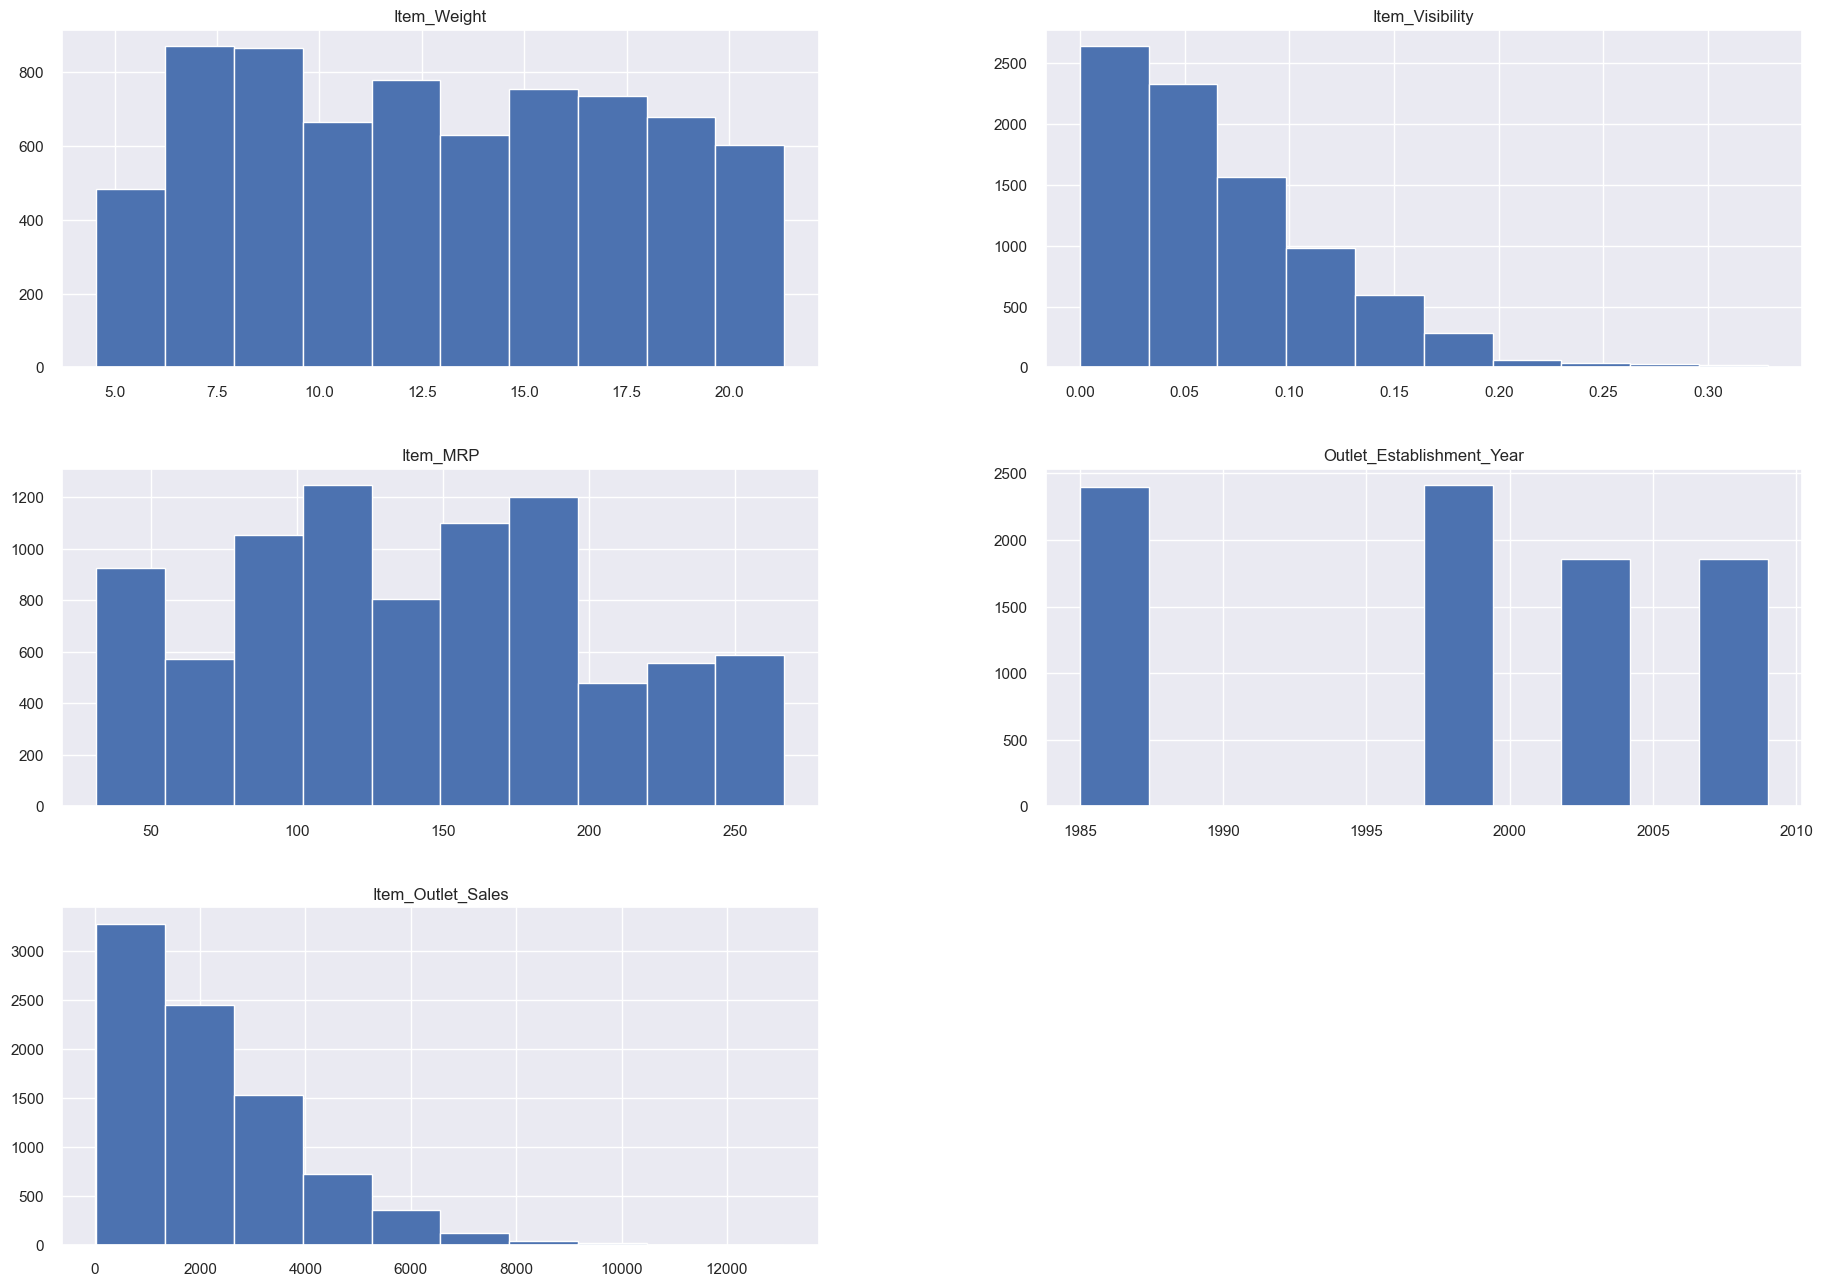

In [87]:
# checking the distribution of training data

train_data.hist(figsize=(20,15))

<b>Check for unique values</b>

In [88]:
print(train_data['Item_Fat_Content'].unique())
print(train_data['Item_Type'].unique())
print(train_data['Outlet_Establishment_Year'].unique())
print(train_data['Outlet_Location_Type'].unique())
print(train_data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [89]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')
# train_data['Item_Fat_Content']

In [90]:
train_data['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

### Check for Outliers

In [91]:
import matplotlib.pyplot as plt

Item_Weight                  AxesSubplot(0.08,0.07;0.15x0.81)
Item_Visibility              AxesSubplot(0.26,0.07;0.15x0.81)
Item_MRP                     AxesSubplot(0.44,0.07;0.15x0.81)
Outlet_Establishment_Year    AxesSubplot(0.62,0.07;0.15x0.81)
Item_Outlet_Sales             AxesSubplot(0.8,0.07;0.15x0.81)
dtype: object

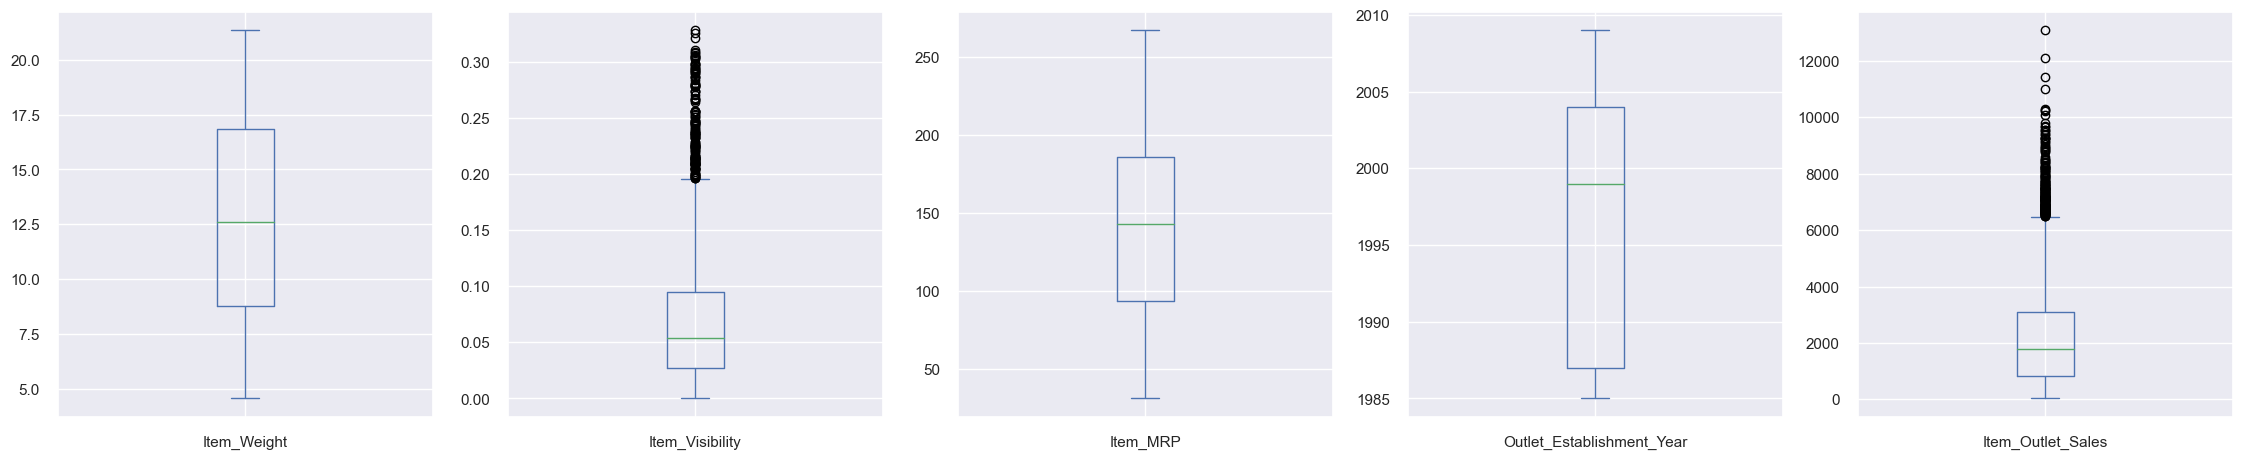

In [92]:

train_data.plot(kind='box', 
                subplots=True, 
                layout=(1,5),
                figsize=(25,5)
               )

In Item_Outlet_Sales, the outliers can remain constant due to seasonal and promotional sales hike.

### Checking Null Values

In [93]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<b>Item_Weight</b> and <b>Outlet_Size</b> has null values.

In [94]:
# Now we will Check the percentage of NULL values with our overall records

print("Item Weight NULL value percentage: ", .1463/8523)
print("Outlet Size NULL value percentage: ", 2410/8523)
print("Item Visiblity NULL value percentage: ", 228/8523)

Item Weight NULL value percentage:  1.716531737651062e-05
Outlet Size NULL value percentage:  0.2827642848762173
Item Visiblity NULL value percentage:  0.026751143963393172


As there are more than 5% NULL values, so we cannot delete those records and needs to impute them.

<b>Item_Weight</b> is a numeric column, so it needs to be imputed with MEAN or MEDIAN or MODE. (MODE is considered more usefull during imputing)

<b>Outlet_Size</b> is a categorical column, so it need to be imputed with MODE.

<b>Item_Visibility</b> is having 2% NULL values, ideally we can drop those, but here we are imputing that as well.

In [95]:
print(train_data['Item_Weight'].mode())
print(train_data['Item_Visibility'].mean())
print(train_data['Outlet_Size'].mode())

0    12.15
Name: Item_Weight, dtype: float64
0.06613202877895108
0    Medium
Name: Outlet_Size, dtype: object


In [96]:
# Now, we will replace the Null values with mean and mode from the result of above

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(12.15)
train_data['Item_Visibility'] = train_data['Item_Visibility'].fillna(0.06613202877895108)
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0, 0.06613202877895108)
# Replaced Zeros with mean values, because zero do not make any sense in Item_Visibility.

train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('Medium')

In [97]:
train_data.describe()

Item_Weight  Item_Visibility   Item_MRP    Outlet_Establishment_Year  \
count  8523.000000    8523.000000    8523.000000         8523.000000          
mean     12.736176       0.070213     140.992782         1997.831867          
std       4.234540       0.048742      62.275067            8.371760          
min       4.555000       0.003575      31.290000         1985.000000          
25%       9.310000       0.033085      93.826500         1987.000000          
50%      12.150000       0.062517     143.012800         1999.000000          
75%      16.000000       0.094585     185.643700         2004.000000          
max      21.350000       0.328391     266.888400         2009.000000          

       Item_Outlet_Sales  
count     8523.000000     
mean      2181.288914     
std       1706.499616     
min         33.290000     
25%        834.247400     
50%       1794.331000     
75%       3101.296400     
max      13086.964800

### Univariate Analysis

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

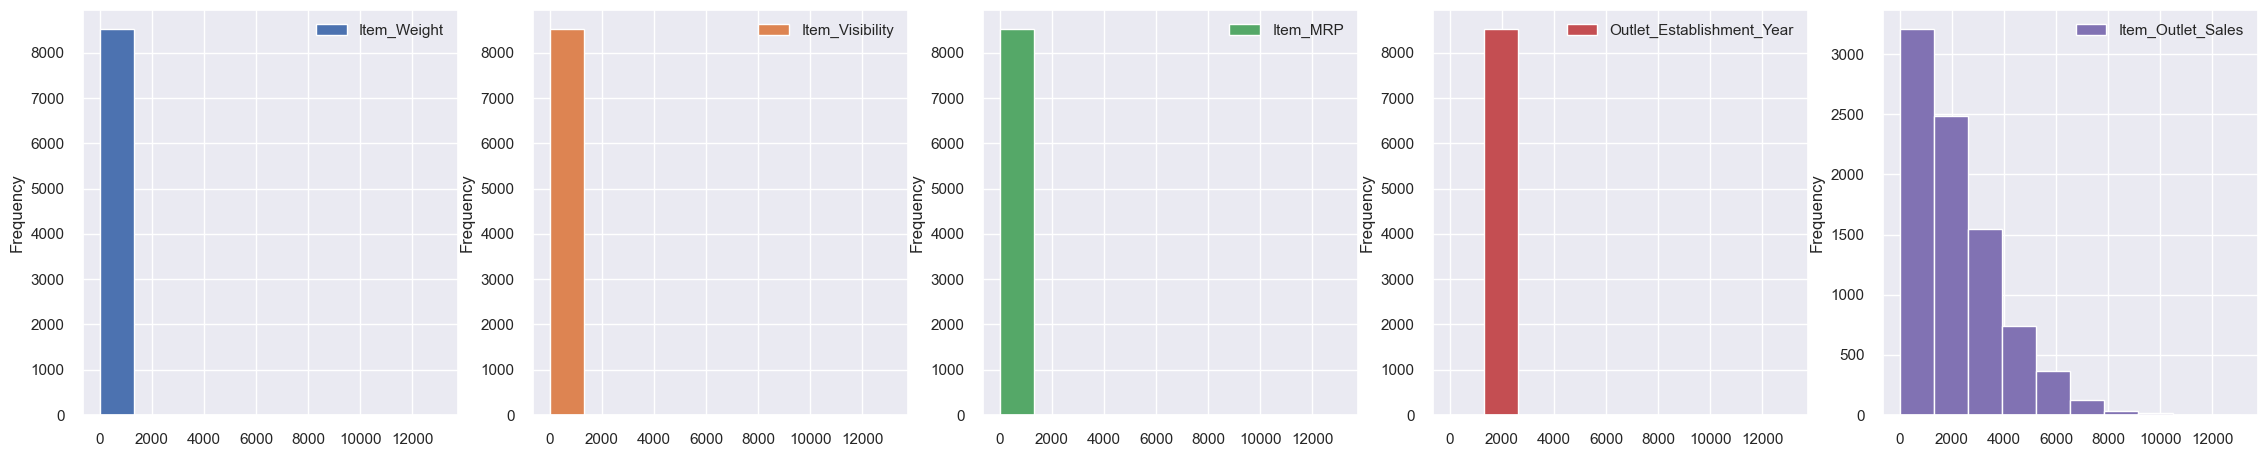

In [98]:
train_data.plot(kind = 'hist', 
                subplots = True,
                layout = (1,5),
                figsize = (25,5)
          )

Item_Visibility, Item_MRP and Outlet_Establishment_Year are having similar data in the dataset. 

While Item_Outlet_Sales is hvaing some very high values like 10000, which can happen. 

As during some festival seasons the sales can increase exponentially. So, we won't drop those high values nor would replace them.

### Bivariate Analysis

<AxesSubplot: >

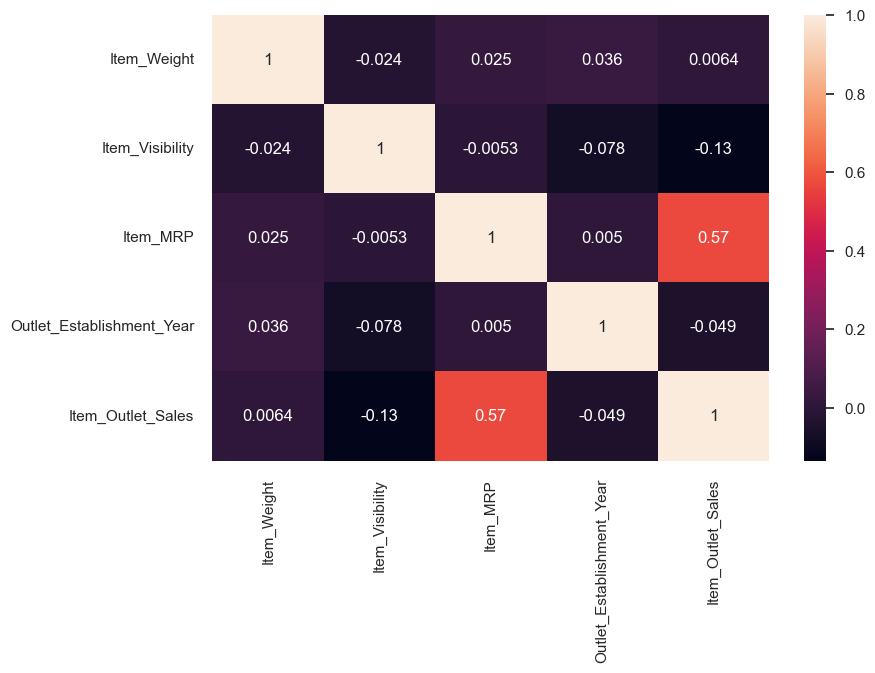

In [99]:
df = train_data.corr()
sns.heatmap(df, annot=True)

We can see from the Heatmap plot that there is no high correlation between all features, except <b>Item_Outlet_Sales</b> with <b>Item_MRP</b> which is 0.57

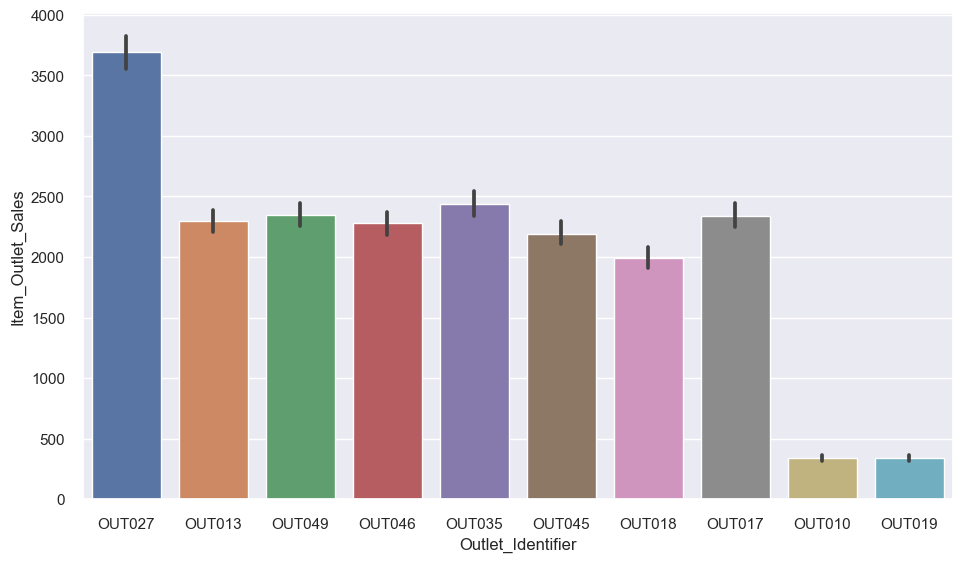

In [100]:
plt.figure(figsize=(10,6))
'''sns.barplot(x=train_data['Outlet_Identifier'], 
            y=train_data['Item_Outlet_Sales'])
train_data['Outlet_Identifier'].value_counts()
'''

# Get the counts of each category and sort them in descending order
order = train_data['Outlet_Identifier'].value_counts().index

# Create the bar plot with the specified order
sns.barplot(x=train_data['Outlet_Identifier'], 
            y=train_data['Item_Outlet_Sales'],
            order=order)

plt.show()

From the above plot, we can say that <b>Outlet No. 27</b> has highest sales. 

In [101]:
'''
color_scale = px.colors.sequential.Viridis
fig = px.bar(train_data,
            x = 'Outlet_Identifier',
            y = 'Item_Outlet_Sales',
            title = 'Outlet Sales',
            color = 'Outlet_Identifier',
            color_discrete_sequence = color_scale,
            labels= {'Item_Otlet_Sales': 'Sales'},
            height=500, width = 700)
fig.show()
'''

"\ncolor_scale = px.colors.sequential.Viridis\nfig = px.bar(train_data,\n            x = 'Outlet_Identifier',\n            y = 'Item_Outlet_Sales',\n            title = 'Outlet Sales',\n            color = 'Outlet_Identifier',\n            color_discrete_sequence = color_scale,\n            labels= {'Item_Otlet_Sales': 'Sales'},\n            height=500, width = 700)\nfig.show()\n"

### Multivariate Analysis

pairplot is a function in the Seaborn data visualization library that creates a matrix of scatterplots, allowing to visualize pairwise relationships in a dataset. 

It's particularly useful when we have a multivariate dataset, meaning more than two variables.

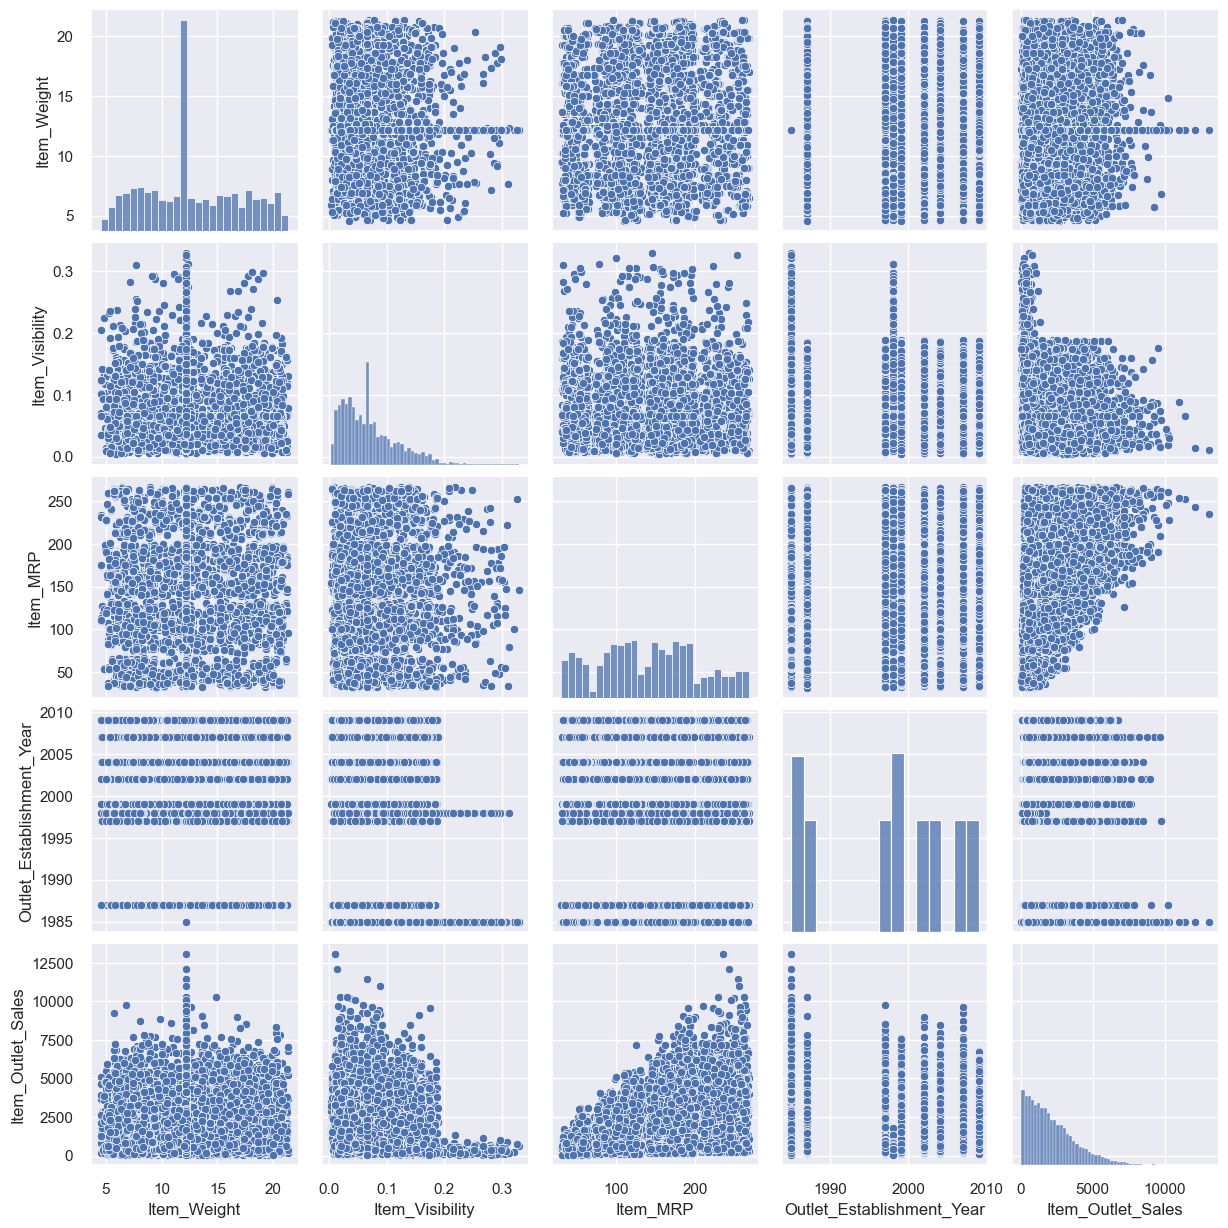

In [102]:
sns.pairplot(train_data)

## EDA

In [103]:
df = train_data.copy()

### 1. What are the most and least sold products?

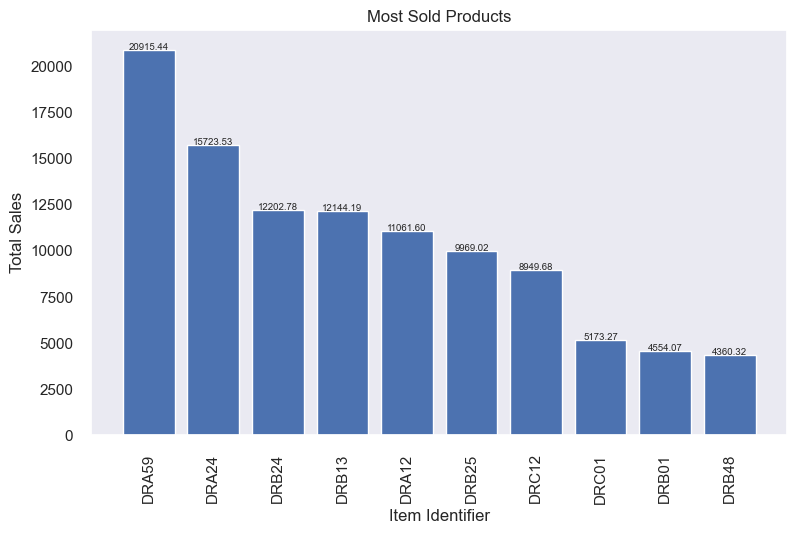

In [104]:
# Group the data by Item_Type and sum the Item_Outlet_Sales
grouped = df.groupby("Item_Identifier")["Item_Outlet_Sales"].sum()
grouped_top_10 = grouped.head(10)
# Sort the grouped data in descending order

sorted = grouped_top_10.sort_values(ascending=False)

# Plot the sorted data as a bar chart
plt.figure(figsize=(8,5))
plt.bar(sorted.index, sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Item Identifier")
plt.ylabel("Total Sales")
plt.title("Most Sold Products")
plt.grid(False)
# Add data points on each bar
for x, y in zip(sorted.index, sorted.values):
    plt.text(x, y, f"{y:.2f}", ha="center", fontsize="xx-small")
    
plt.show()

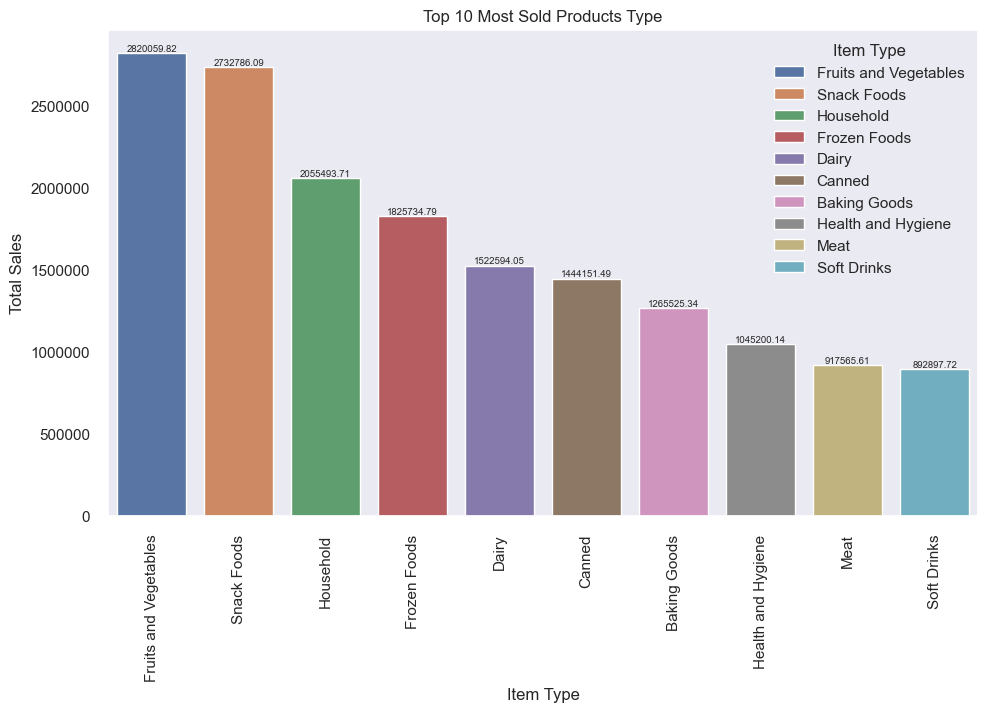

In [105]:

# Group the data by Item_Type and sum the Item_Outlet_Sales
grouped = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()

# Sort the grouped data in descending order
sorted_top_10 = grouped.sort_values(ascending=False).head(10)

# Plot the sorted data as a bar chart with different colors for each item type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_top_10.index, y=sorted_top_10.values, hue=sorted_top_10.index, dodge=False)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Top 10 Most Sold Products Type")
plt.legend(loc="upper right", title="Item Type")
plt.grid(False)

# Add data points to the bars
for i, value in enumerate(sorted_top_10):
    ax.text(i, value + 50, f"{value:.2f}", ha='center', va='bottom', fontsize='xx-small')

plt.show()

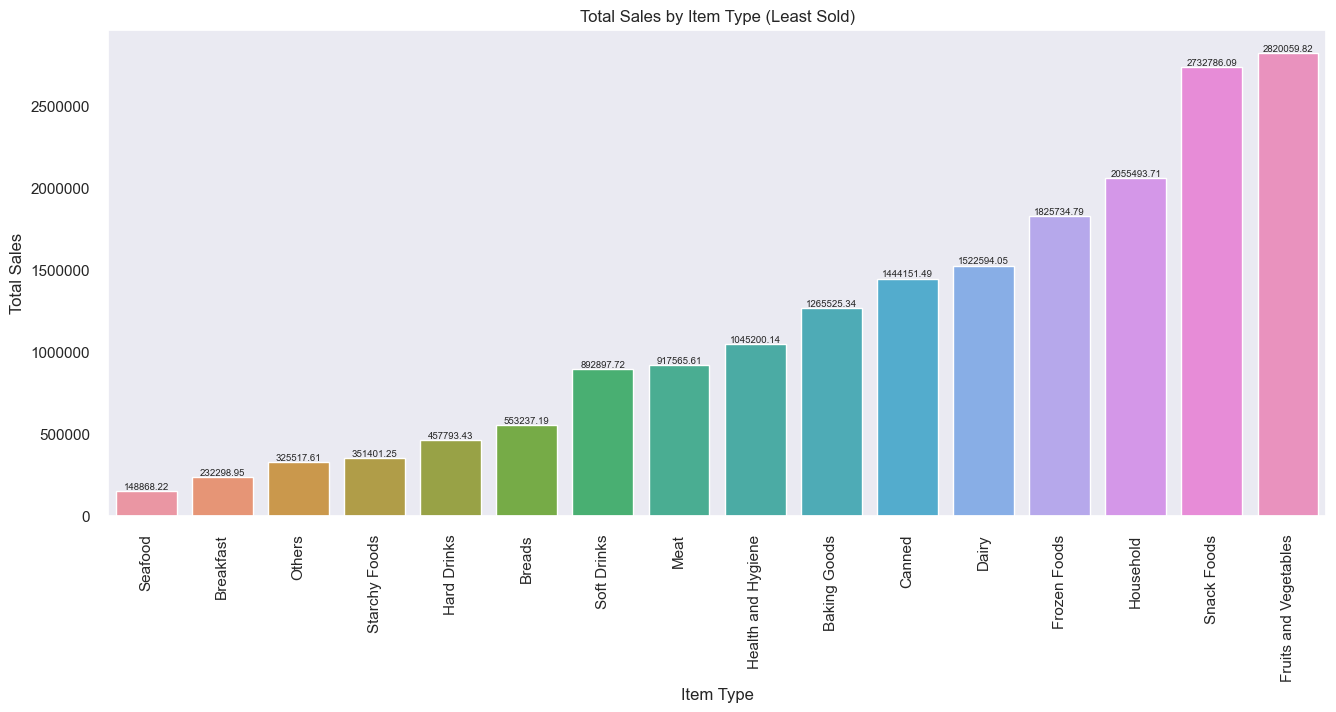

In [106]:
# Group the data by Item_Type and sum the Item_Outlet_Sales
grouped_by_item_type = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()

# Sort the grouped data in ascending order for least sold products
sorted_least_item_types = grouped_by_item_type.sort_values()

# Plot the sorted data as a bar chart
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=sorted_least_item_types.index, y=sorted_least_item_types.values)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type (Least Sold)")
plt.grid(False)

# Add data points to the bars
for i, value in enumerate(sorted_least_item_types):
    ax.text(i, value + 50, f"{value:.2f}", ha='center', va='bottom', fontsize='xx-small')


plt.show()

From the chart we can see that, the least sales producy type is seafeed. It shows that people has less interest in seafood.

### 2. How does the item weight affect the sales of the products?

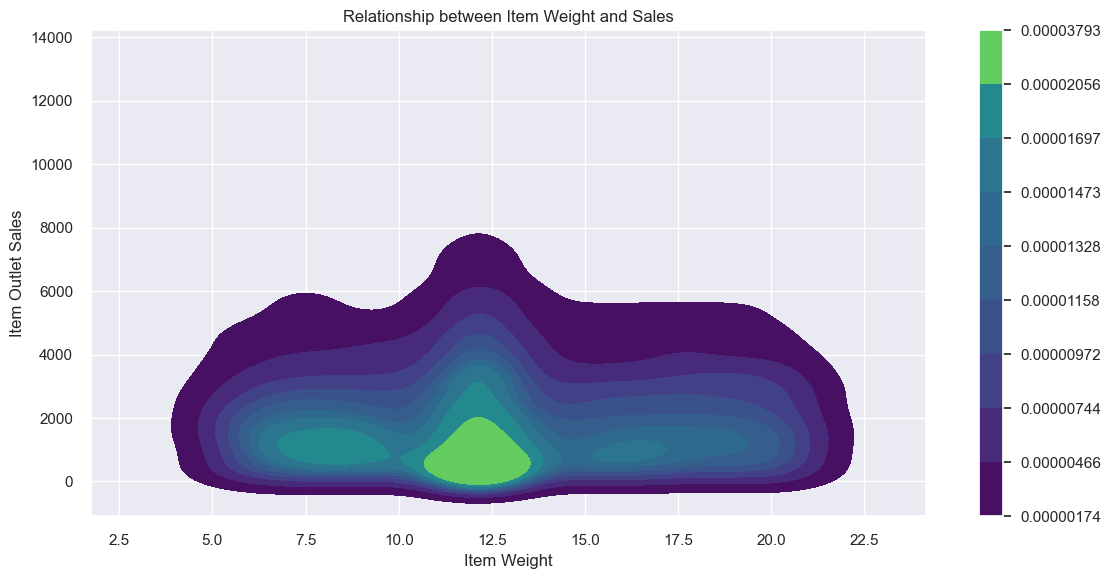

In [107]:
'''
# Scatter plot

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Weight and Sales')
plt.grid(True)
plt.show()
'''

#KDE (Kernel Density Estimation) Plot:
#A KDE plot provides a smoothed estimate of the distribution of the data.

plt.figure(figsize=(12, 6))
scatter = sns.kdeplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, cmap='viridis', fill=True, cbar=True)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Weight and Sales')

# Add a colorbar
cbar = scatter.collections[0].colorbar
#cbar.set_label('Density')

plt.show()

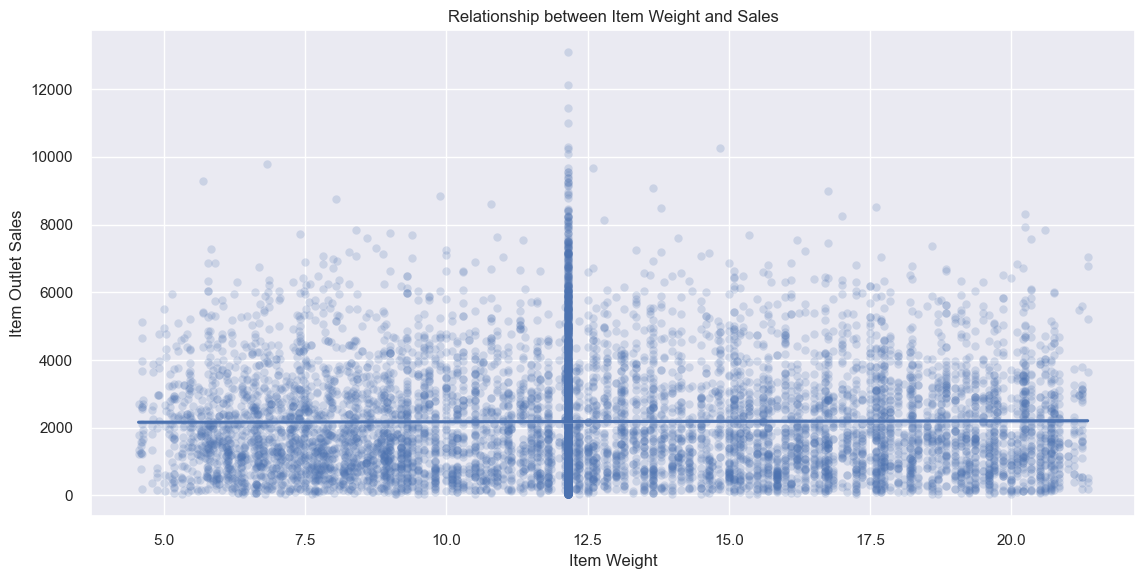

In [108]:
# Regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, scatter_kws={'alpha':0.2})
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Weight and Sales')
plt.show()

### 3. How does the item visibility affect the sales of the products?

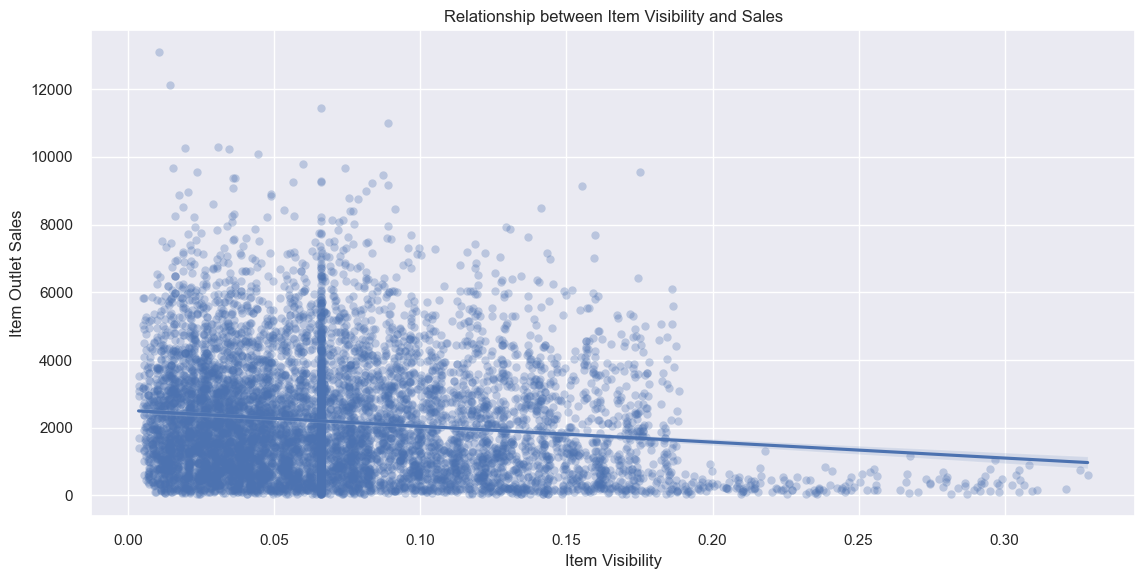

In [109]:
# Regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, scatter_kws={'alpha':0.3})
#sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, alpha=0.3)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Visibility and Sales')
plt.show()

### 4. How does the item fat content affect the sales of the products?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


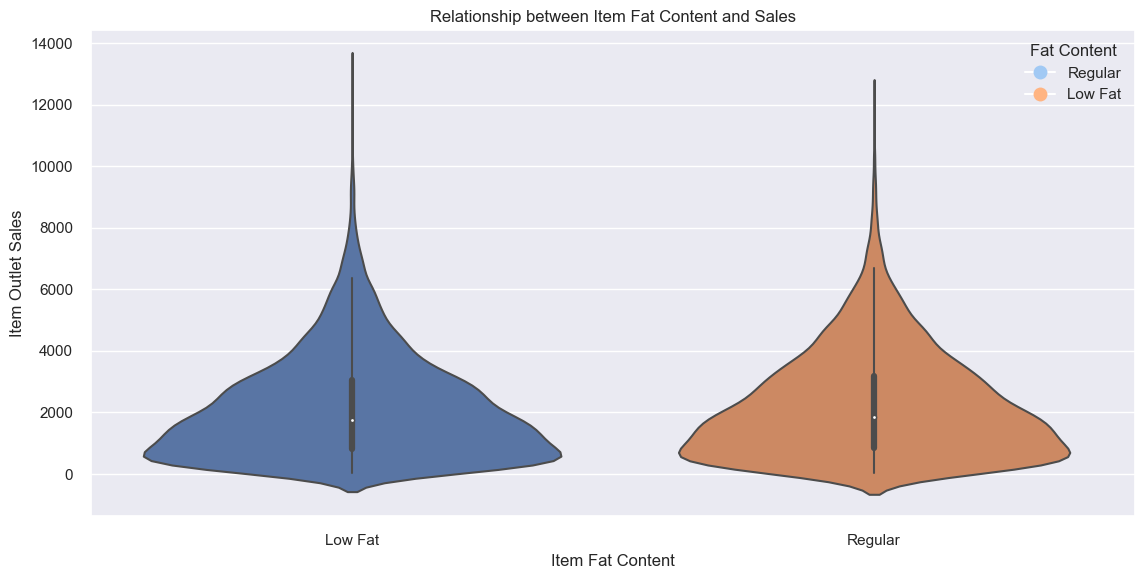

In [110]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Fat Content and Sales')
plt.legend()

# Manually create a legend
legend_labels = ['Regular', 'Low Fat']
colors = sns.color_palette('pastel')[:2]  # Assuming 2 categories, adjust as needed
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(legend_handles, legend_labels, title='Fat Content')

plt.show()

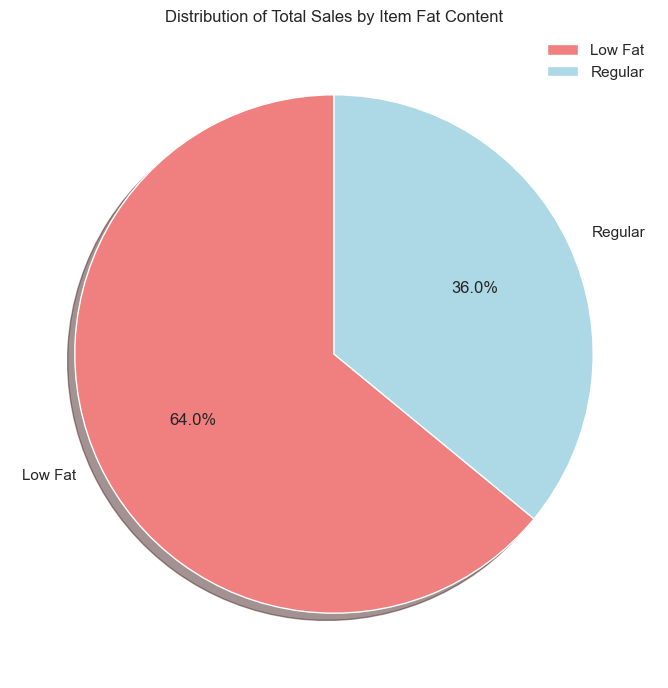

In [111]:
# Group the data by Item_Fat_Content and sum the Item_Outlet_Sales
grouped_by_fat_content = df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_by_fat_content, labels=grouped_by_fat_content.index, 
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'],
       shadow=True)
plt.title('Distribution of Total Sales by Item Fat Content')
plt.legend()
plt.show()

We can see from the plot that there is <b>64%</b> sales for Low Fat products.

### 5. How does the item type affect the sales of the products?

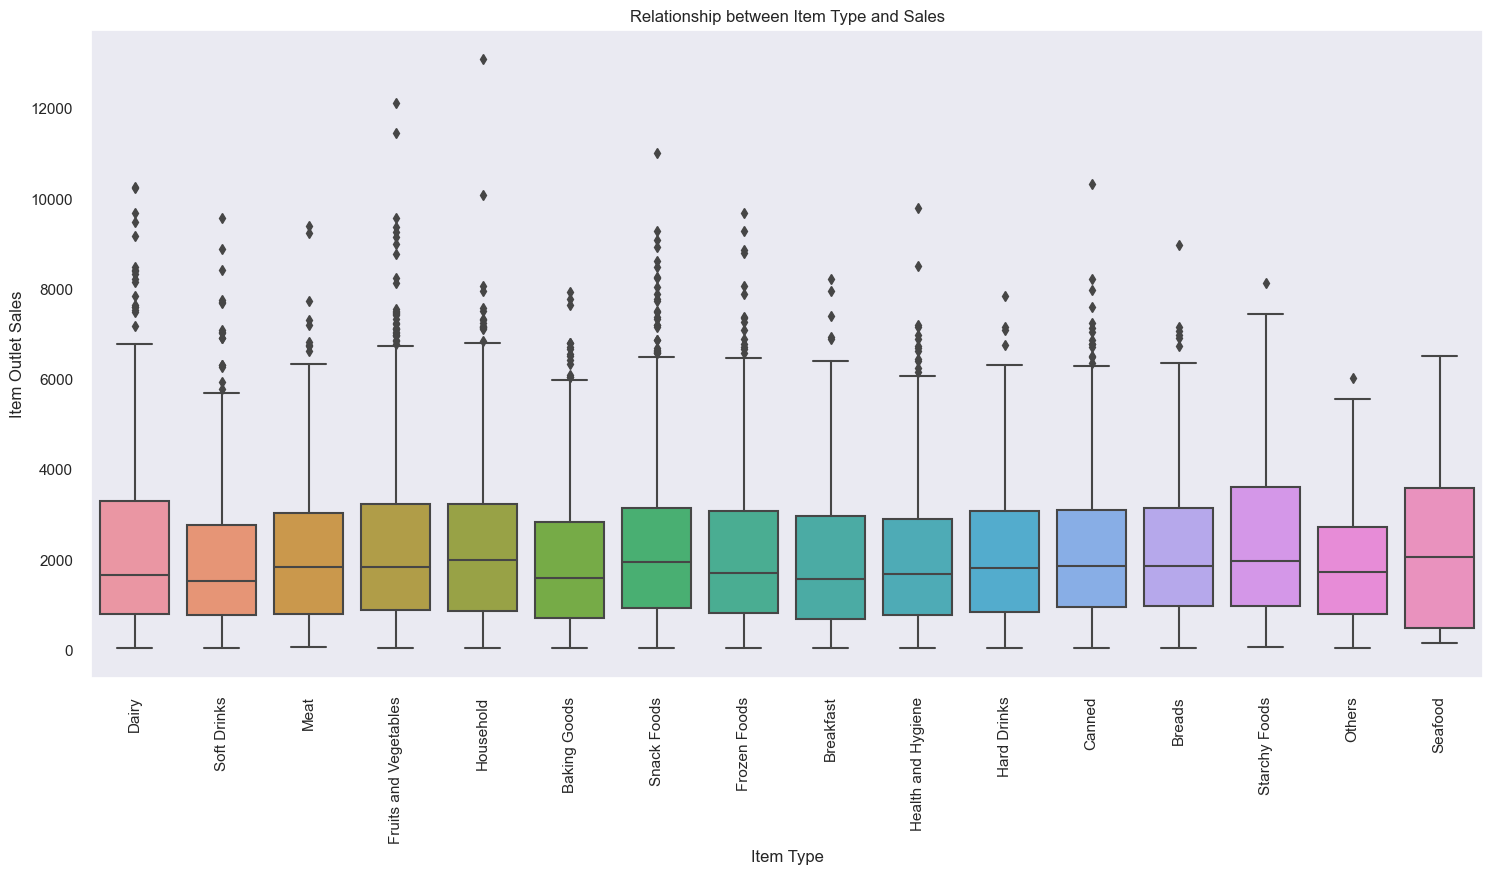

In [112]:
# use of Boxplot to depict the sales
plt.figure(figsize=(16, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Type and Sales')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

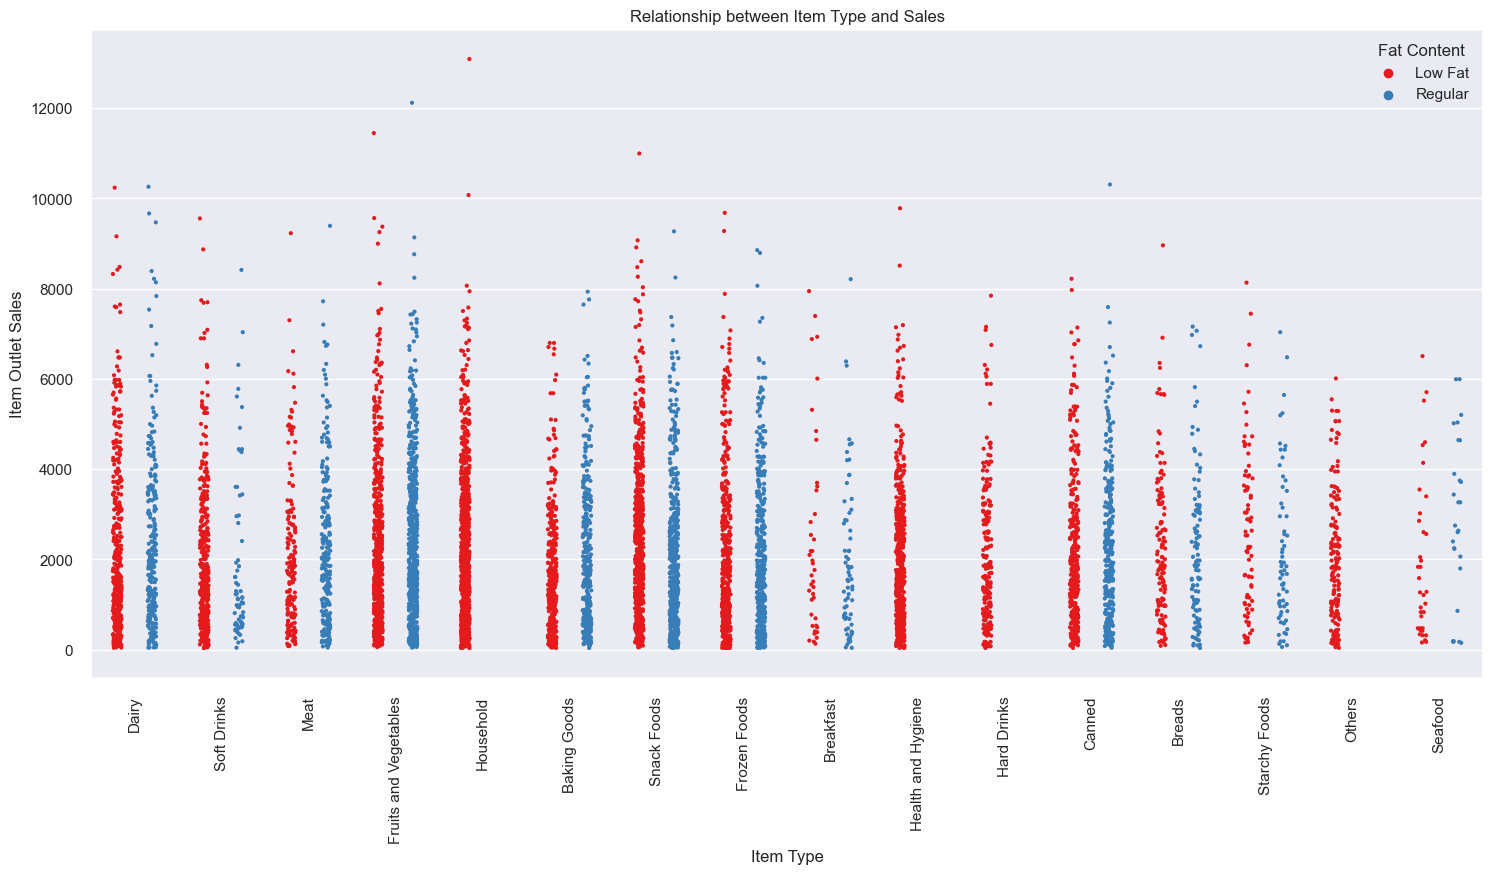

In [113]:
'''
# Create a swarm plot
plt.figure(figsize=(16, 8))
sns.swarmplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Type and Sales')
plt.xticks(rotation=90)
plt.show()
'''

# stripplot
plt.figure(figsize=(16, 8))
sns.stripplot(x='Item_Type', 
              y='Item_Outlet_Sales', 
              hue='Item_Fat_Content', 
              data=df, 
              palette='Set1', 
              dodge=True, 
              size=3, 
              jitter=True)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Type and Sales')
plt.xticks(rotation=90)


# Add legend
plt.legend(title='Fat Content')

<b>Note:</b> From the above plot we can observe that there are certain positive outliers which are for seasonal sales.

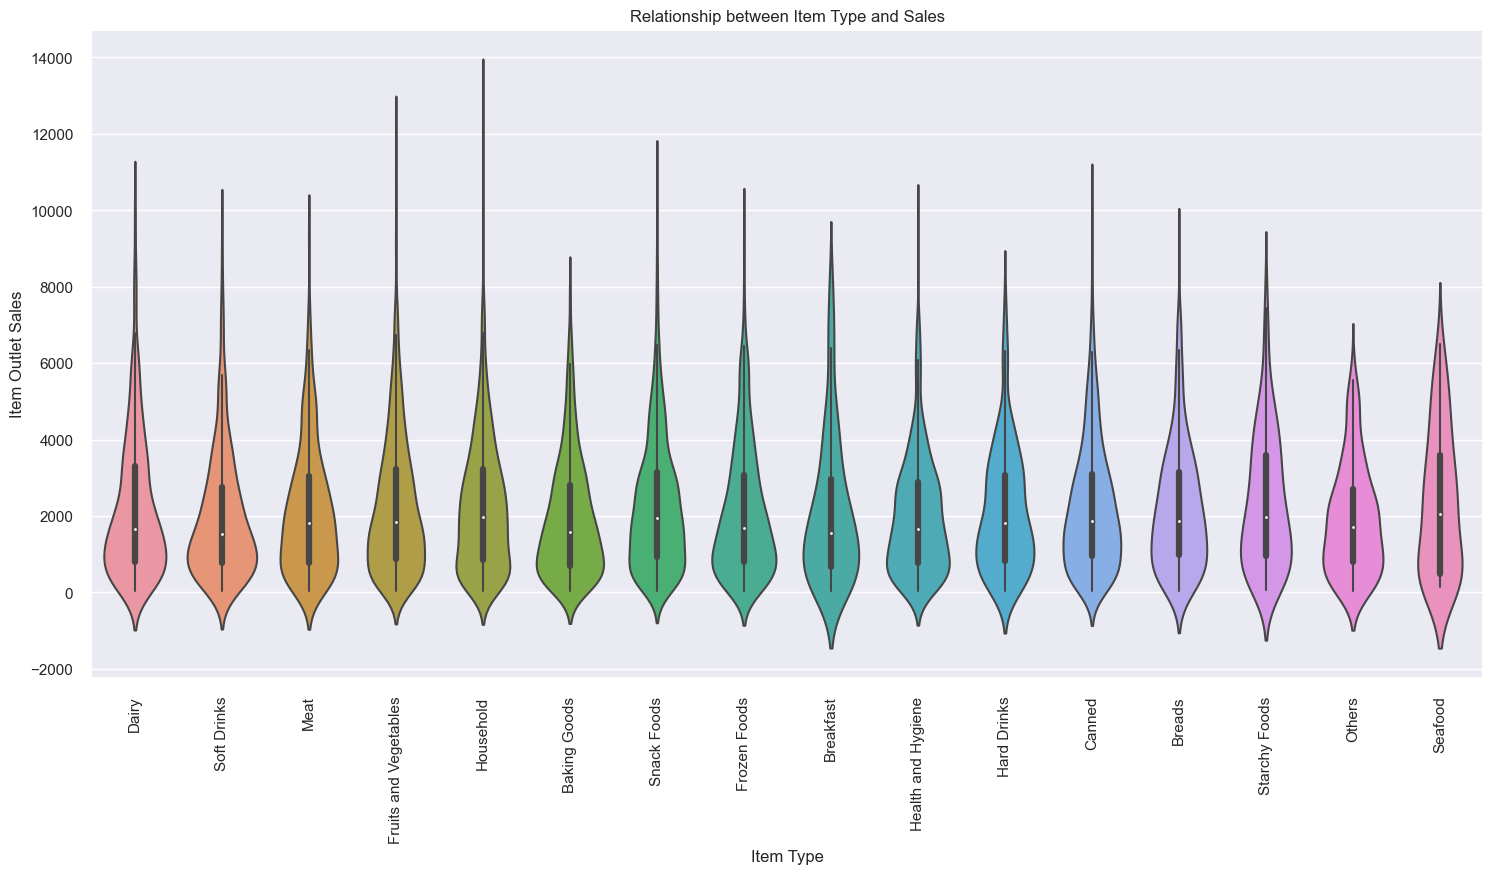

In [114]:
# Violin plot for more clarity
plt.figure(figsize=(16, 8))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Type and Sales')
plt.xticks(rotation=90)
plt.show()

### 6. How does the item MRP affect the sales of the products?

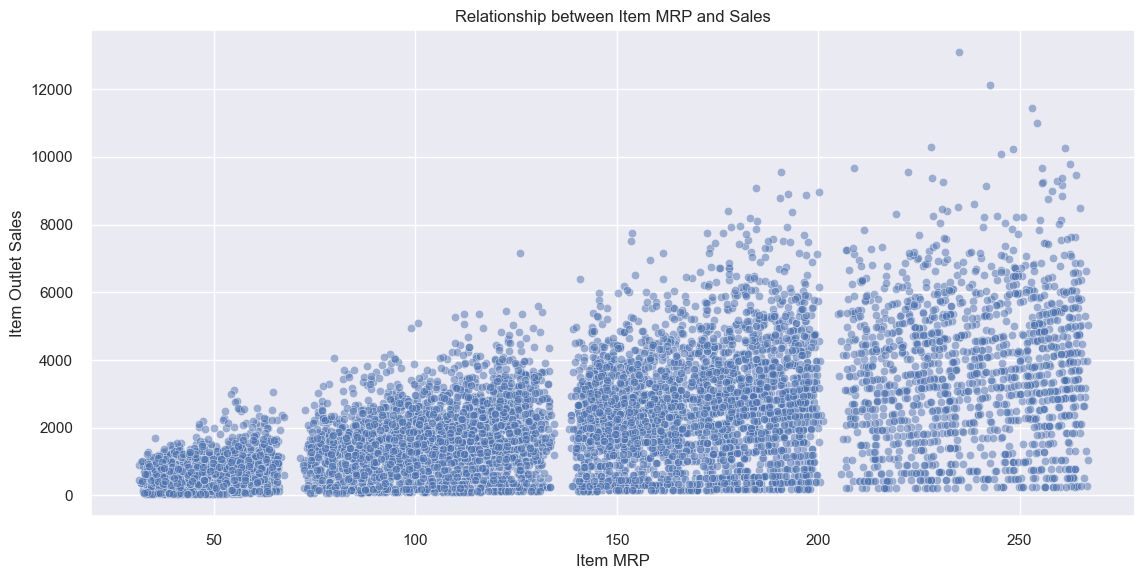

In [115]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Sales')
plt.show()

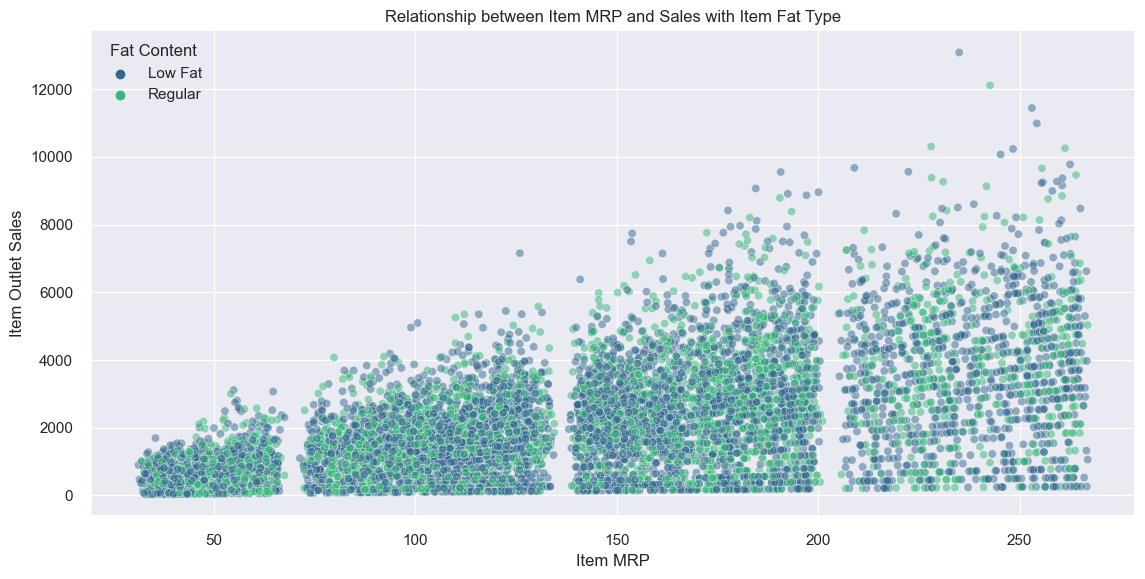

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_MRP', 
                y='Item_Outlet_Sales', 
                data=df, 
                hue='Item_Fat_Content', 
                palette='viridis', 
                alpha=0.5)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Sales with Item Fat Type')
plt.legend(title='Fat Content')
plt.show()

From the plot we can see that people used to prefer lower price products.

### 7.	What are the most and least profitable outlets?

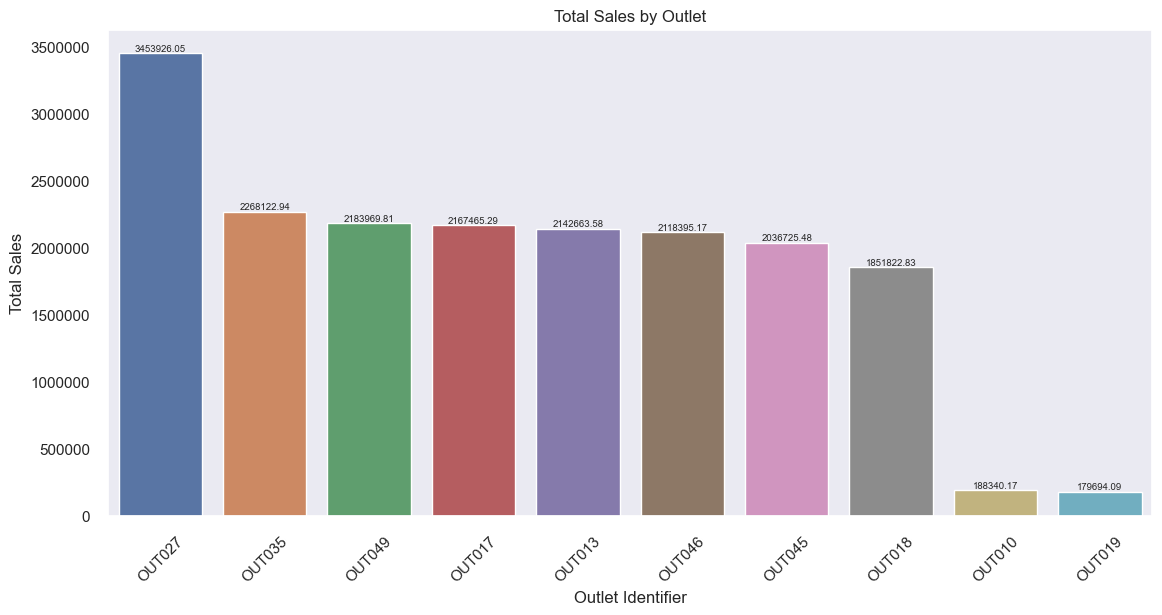

In [117]:
# Group the data by Outlet_Identifier and sum the Item_Outlet_Sales
grouped_outlets = df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum()

# Sort the grouped data in descending order
sorted_outlets = grouped_outlets.sort_values(ascending=False)

# Plot the sorted data as a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_outlets.index, y=sorted_outlets.values)
plt.xticks(rotation=45)
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet")
plt.grid(False)

# Add data points to the bars
for i, value in enumerate(sorted_outlets):
    ax.text(i, value + 50, f"{value:.2f}", ha='center', va='bottom', fontsize='xx-small')

plt.show()

<b>OUTLET NO. 027</b> has highest sales amonng others.

The company need to focus on least sales Outlates which are <b>OUTLET No. 010</b> and <b>OUTLET NO. 019</b>

### 8. How does the outlet size affect the sales of the products?

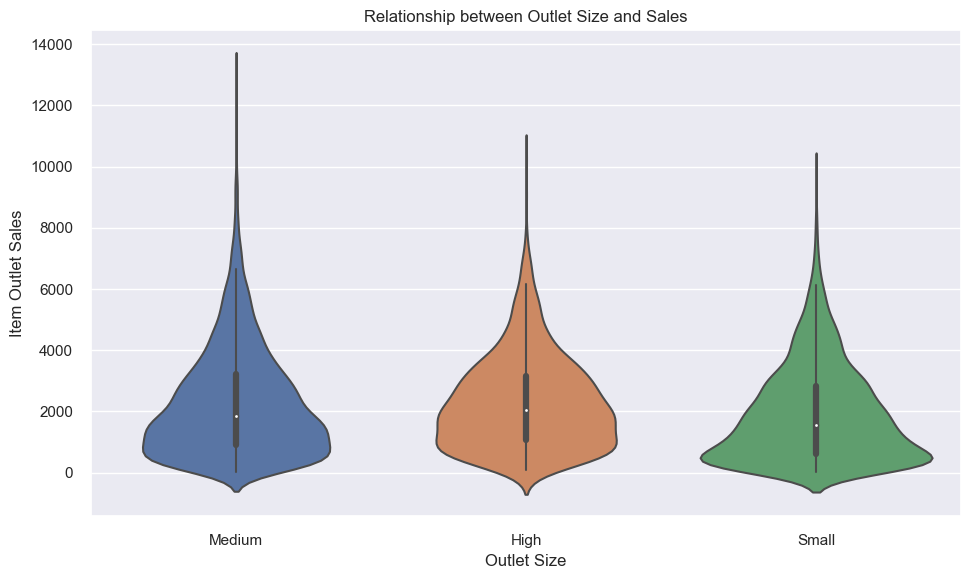

In [118]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Outlet Size and Sales')
plt.show()

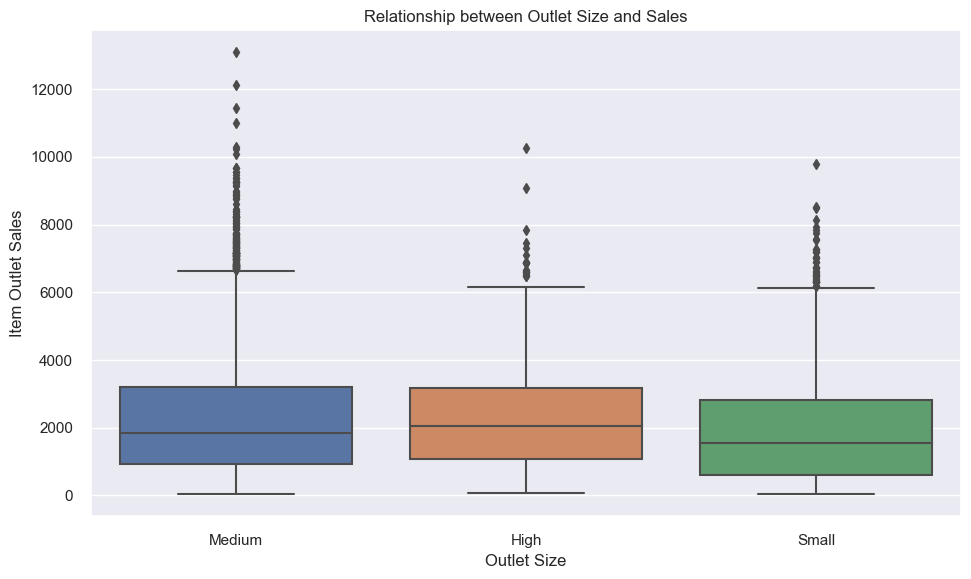

In [119]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Outlet Size and Sales')
plt.show()

### 9.	How does the outlet location type affect the sales of the products?

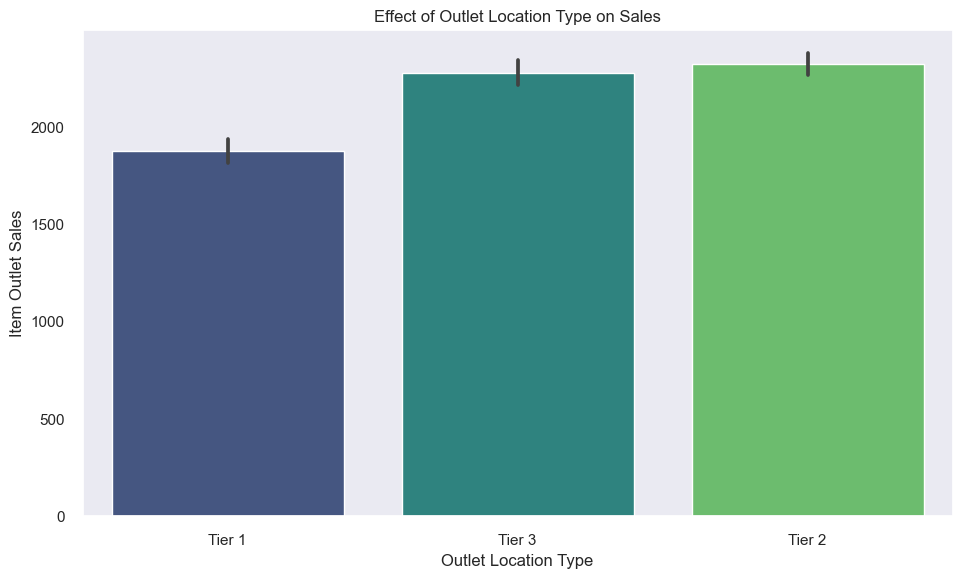

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Location Type on Sales')
plt.grid(False)

plt.show()

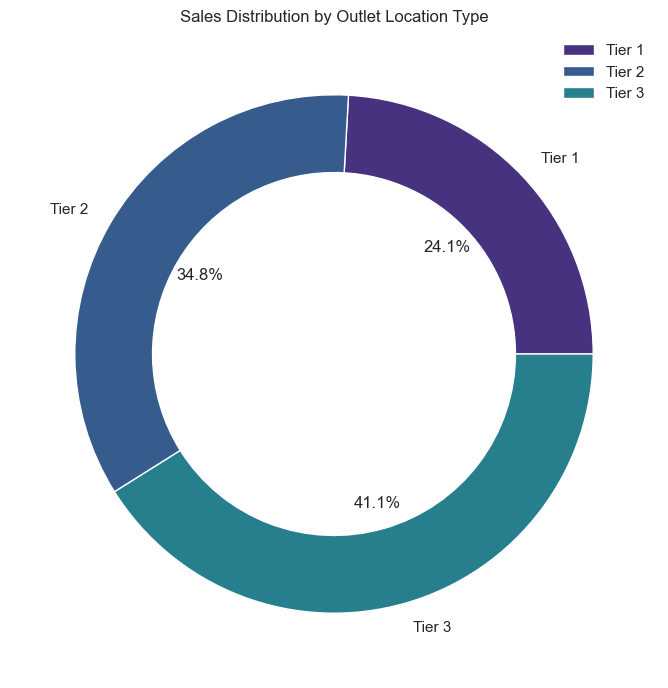

In [121]:
# Calculate total sales for each outlet location type
total_sales_by_location = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(total_sales_by_location, 
                                    labels=total_sales_by_location.index, 
                                    autopct='%1.1f%%', 
                                    colors=sns.color_palette('viridis'), 
                                    wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='white'))

# Adding legend
plt.legend(patches, total_sales_by_location.index, loc='upper right')

plt.title('Sales Distribution by Outlet Location Type')
plt.show()

From the above donut chart, there is no marginal difference for sales between <b>Tier-2</b> and <b>Tier-3</b> Location type.

### 10.	How does the outlet type affect the sales of the products?

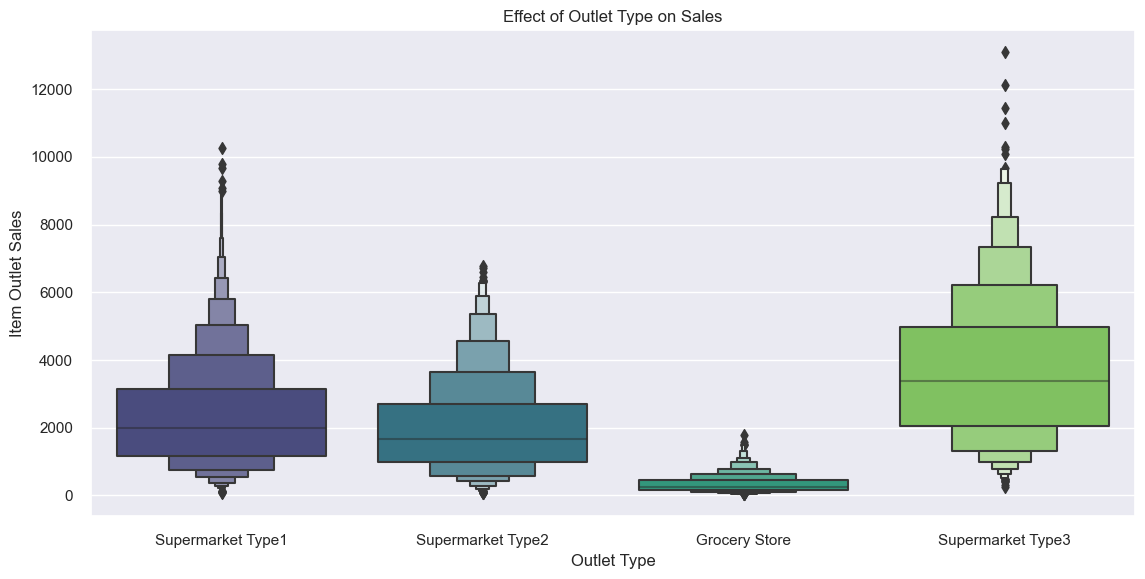

In [122]:
# Boxenplot 

plt.figure(figsize=(12, 6))
sns.boxenplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Type on Sales')
plt.show()

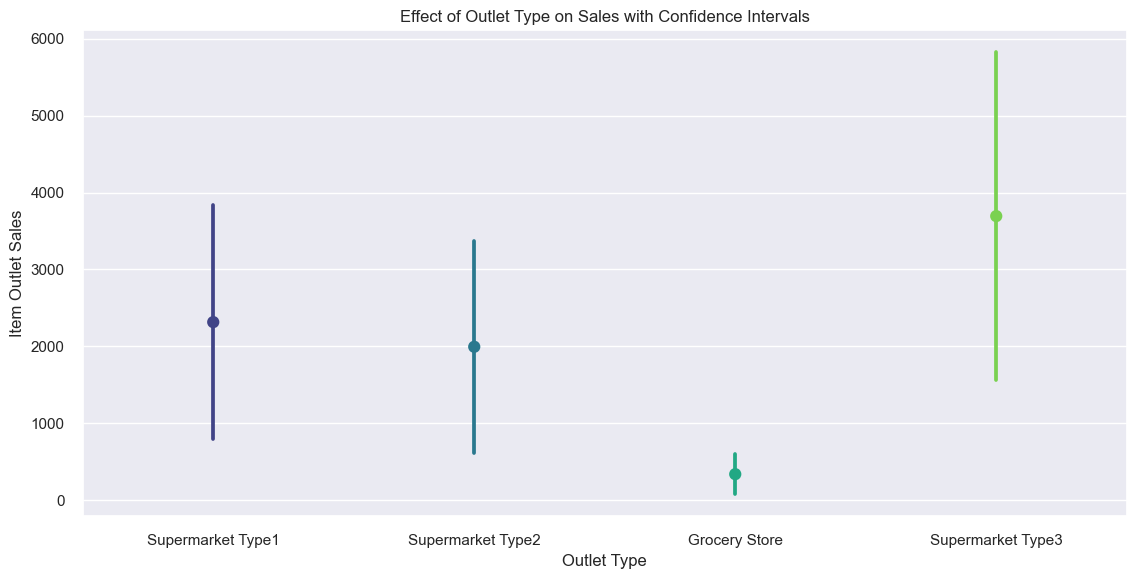

In [123]:
'''
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis', size=3)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Type on Sales')
plt.show()
'''

plt.figure(figsize=(12, 6))
sns.pointplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, errorbar='sd', palette='viridis')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Type on Sales with Confidence Intervals')
plt.show()

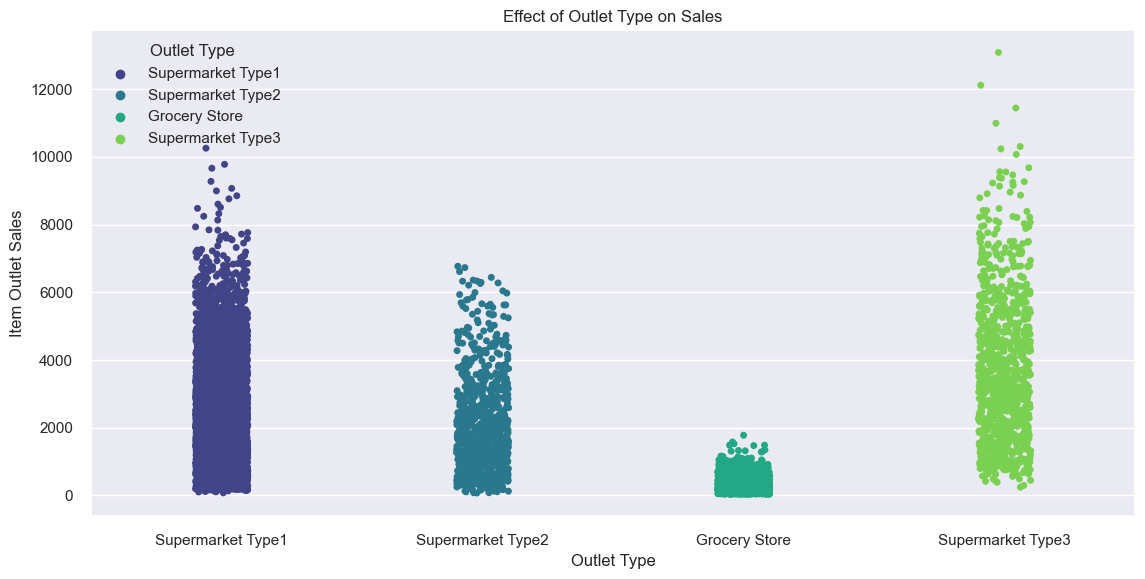

In [124]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, hue='Outlet_Type', palette='viridis', jitter=True)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Type on Sales')

# Add legend
plt.legend(title='Outlet Type', loc='upper left')
plt.show()

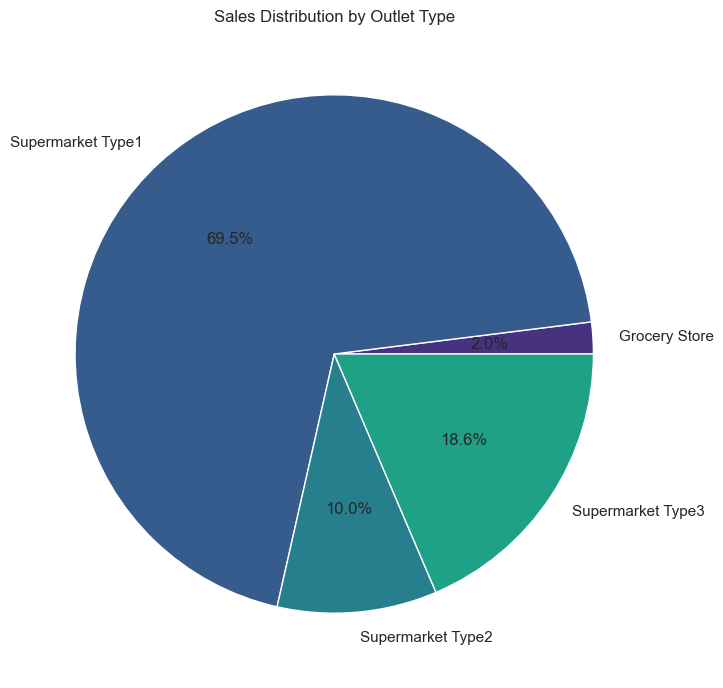

In [125]:
# Calculate total sales for each outlet type
total_sales_by_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_outlet, labels=total_sales_by_outlet.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sales Distribution by Outlet Type')
plt.show()

From the above graphs we can clearly say that, <b>Supermarket Type 1</b> has more revenue than <b>Grocery Store</b>.

We suggest to work more on Grocery Store to increase the sales.

### 11.	How does the outlet establishment year affect the sales of the products?

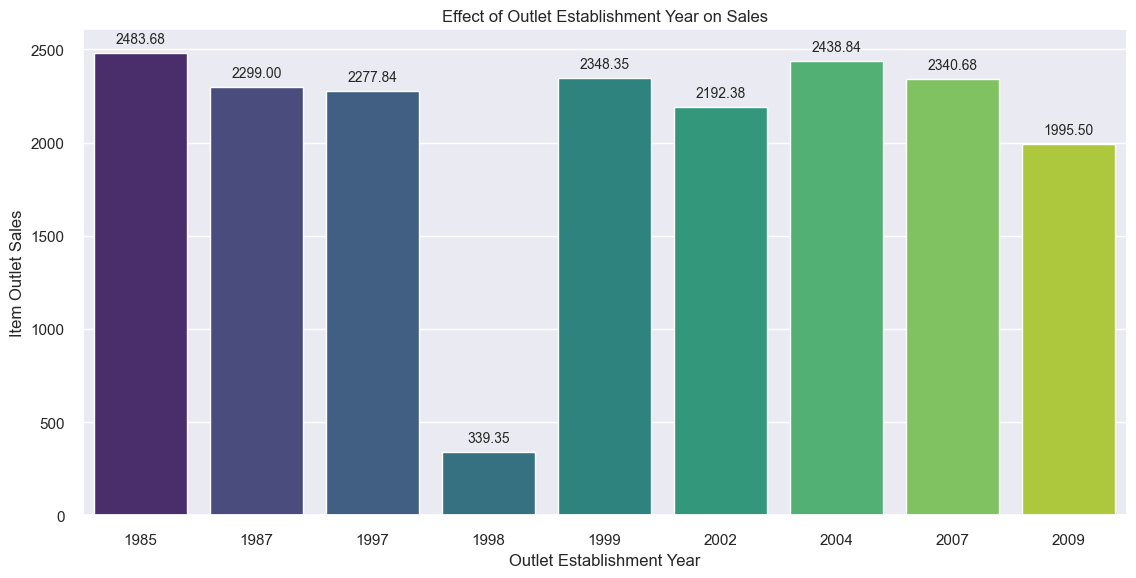

In [126]:
plt.figure(figsize=(12, 6))

# Create a bar plot
bar_plot = sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, ci=None, palette='viridis')

# Add data points on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='small')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Outlet Establishment Year on Sales')
plt.show()

### 12.	What are the trends and patterns of the sales over time?

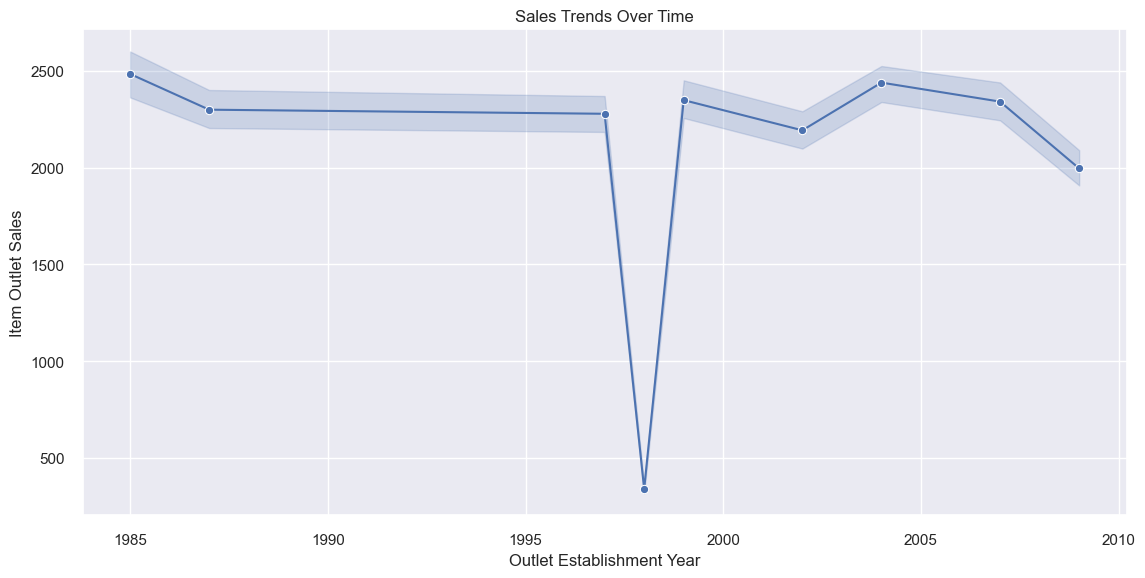

In [127]:
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, marker='o', color='b')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Sales Trends Over Time')
plt.show()

### 13.	What are the factors that influence the sales of the products?

### Regression Analysis:
Perform regression analysis to model the relationship between features and sales.

In [128]:
import statsmodels.api as sm

X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df['Item_Outlet_Sales']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1459.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:04:50   Log-Likelihood:                -73756.
No. Observations:                8523   AIC:                         1.475e+05
Df Residuals:                    8519   BIC:                         1.475e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             369.4233     62.235     

This summary shows the results of an <b>Ordinary Least Squares</b> (OLS) regression, which is a method of estimating the unknown parameters in a linear regression model by minimizing the sum of squared errors between the observed and predicted values of the dependent variable¹. The summary contains the following information:

- Dependent variable: This is the variable that is being predicted by the model. In this case, it is `Item_Outlet_Sales`, which represents the sales of different items in various outlets.
- Model: This is the type of regression model used. In this case, it is OLS, which is the most common and simple type of linear regression¹.
- Method: This is the technique used to estimate the parameters of the model. In this case, it is `Least Squares`, which means that the model tries to minimize the sum of squared errors between the observed and predicted values of the dependent variable¹.
- Date and Time: These are the date and time when the summary was generated.
- No. Observations: This is the number of data points used in the model. In this case, it is `8523`, which means that there are 8523 observations of the dependent and independent variables.
- Df Residuals: This is the degrees of freedom of the residuals, which is the number of observations minus the number of parameters estimated by the model. In this case, it is `8519`, which means that there are 8519 independent pieces of information in the residuals².
- Df Model: This is the degrees of freedom of the model, which is the number of parameters estimated by the model minus one. In this case, it is `3`, which means that there are 3 parameters estimated by the model (the intercept and the coefficients of the independent variables)².
- Covariance Type: This is the type of covariance matrix used to calculate the standard errors of the parameters. In this case, it is `nonrobust`, which means that the standard errors are not adjusted for heteroscedasticity or autocorrelation³.
- Coef: This is the estimated value of the parameters of the model. In this case, there are four coefficients: the intercept (`const`), which is the expected value of the dependent variable when all the independent variables are zero; and the coefficients of the independent variables (`Item_Weight`, `Item_Visibility`, and `Item_MRP`), which represent the change in the expected value of the dependent variable for a one-unit increase in the corresponding independent variable, holding all other variables constant.
- Std err: This is the standard error of the estimated coefficients, which measures the variability of the estimates due to sampling error. A smaller standard error means that the estimate is more precise⁴.
- t: This is the t-statistic of the estimated coefficients, which is the ratio of the coefficient to its standard error. A larger t-statistic means that the coefficient is more statistically significant⁴.
- P>|t|: This is the p-value of the t-statistic, which is the probability of obtaining a t-statistic as extreme or more extreme than the observed one, under the null hypothesis that the true coefficient is zero. A smaller p-value means that the coefficient is more statistically significant⁴.
- [0.025 0.975]: This is the 95% confidence interval of the estimated coefficients, which means that there is a 95% probability that the true coefficient lies within this range. A narrower confidence interval means that the estimate is more precise⁴.
- R-squared: This is the coefficient of determination, which measures the proportion of the variation in the dependent variable that is explained by the model. A higher R-squared means that the model fits the data better.
- Adj. R-squared: This is the adjusted coefficient of determination, which is a modified version of the R-squared that penalizes the model for adding more independent variables that do not improve the fit. A higher Adj. R-squared means that the model fits the data better, taking into account the number of independent variables.
- F-statistic: This is the F-statistic of the model, which tests the overall significance of the model. It compares the variance explained by the model to the variance not explained by the model. A higher F-statistic means that the model is more statistically significant.
- Prob (F-statistic): This is the p-value of the F-statistic, which is the probability of obtaining an F-statistic as extreme or more extreme than the observed one, under the null hypothesis that all the coefficients of the independent variables are zero. A smaller p-value means that the model is more statistically significant.
- Log-Likelihood: This is the log-likelihood of the model, which measures the probability of observing the data given the model. A higher log-likelihood means that the model fits the data better.
- AIC: This is the Akaike information criterion, which is a measure of the quality of the model that balances the fit and the complexity of the model. It is calculated as `-2 * log-likelihood + 2 * number of parameters`. A lower AIC means that the model is better.
- BIC: This is the Bayesian information criterion, which is another measure of the quality of the model that balances the fit and the complexity of the model. It is similar to the AIC, but it penalizes the model more for adding more parameters. It is calculated as `-2 * log-likelihood + log(number of observations) * number of parameters`. A lower BIC means that the model is better.
- Omnibus: This is a test of the normality of the residuals, which assumes that the residuals are normally distributed. A higher Omnibus statistic means that the residuals are more deviated from normality.
- Prob(Omnibus): This is the p-value of the Omnibus test, which is the probability of obtaining an Omnibus statistic as extreme or more extreme than the observed one, under the null hypothesis that the residuals are normally distributed. A smaller p-value means that the residuals are more deviated from normality.
- Skew: This is a measure of the asymmetry of the distribution of the residuals. A positive skew means that the residuals are more concentrated on the left of the mean, with a longer tail on the right. A negative skew means that the residuals are more concentrated on the right of the mean, with a longer tail on the left.
- Kurtosis: This is a measure of the peakedness of the distribution of the residuals. A higher kurtosis means that the residuals have a sharper peak and fatter tails, indicating more outliers. A lower kurtosis means that the residuals have a flatter peak and thinner tails, indicating less outliers.
- Durbin-Watson: This is a test of the autocorrelation of the residuals, which assumes that the residuals are not correlated with each other. A Durbin-Watson statistic close to 2 means that there is no autocorrelation. A Durbin-Watson statistic close to 0 or 4 means that there is positive or negative autocorrelation, respectively.
- Jarque-Bera (JB): This is another test of the normality of the residuals, which combines the skewness and kurtosis of the residuals. A higher JB statistic means that the residuals are more deviated from normality.
- Prob(JB): This is the p-value of the JB test, which is the probability of obtaining a JB statistic as extreme or more extreme than the observed one, under the null hypothesis that the residuals are normally distributed. A smaller p-value means that the residuals are more deviated from normality.
- Cond. No.: This is a measure of the multicollinearity of the independent variables, which means that some of the independent variables are highly correlated with each other. A higher Cond. No. means that there is more multicollinearity, which can affect the stability and accuracy of the estimates.

<b>Source:</b> Conversation with Bing:


(1) Interpreting the results of Linear Regression using OLS Summary. https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/.


(2) Understanding Ordinary Least Squares (OLS) Regression. https://builtin.com/data-science/ols-regression.


(3) Ordinary least squares - Wikipedia. https://en.wikipedia.org/wiki/Ordinary_least_squares.


(4) Ordinary Least Squares Method: Concepts & Examples. https://vitalflux.com/ordinary-least-squares-method-concepts-examples/.

### Feature Importance

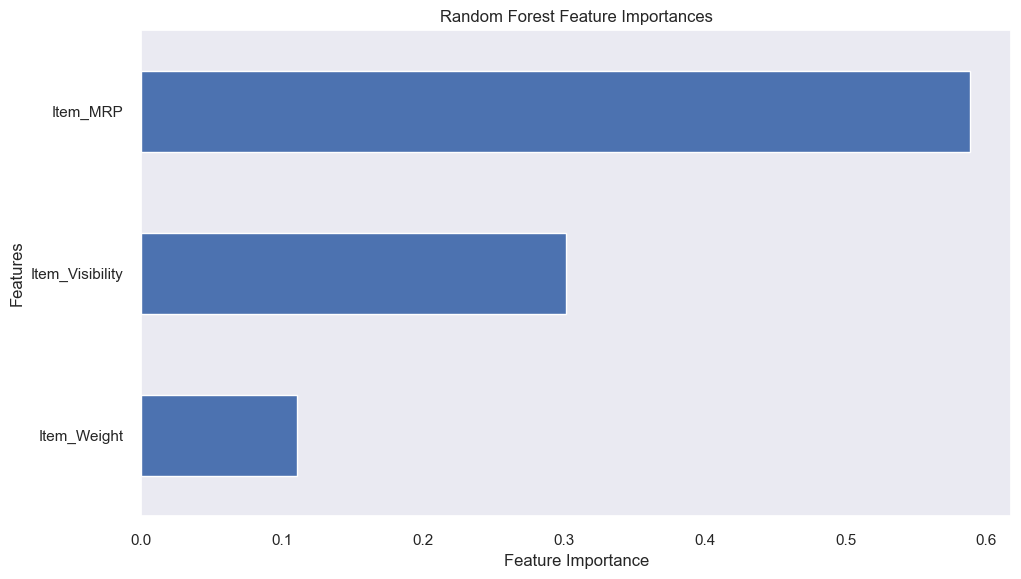

In [129]:
from sklearn.ensemble import RandomForestRegressor

X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
y = df['Item_Outlet_Sales']

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True, inplace=True)

# Plot the feature importances horizontally
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.grid(False)
plt.show()

### Segmentation Analysis:
Analyze sales patterns in different segments of data, by item type, outlet type, or location.

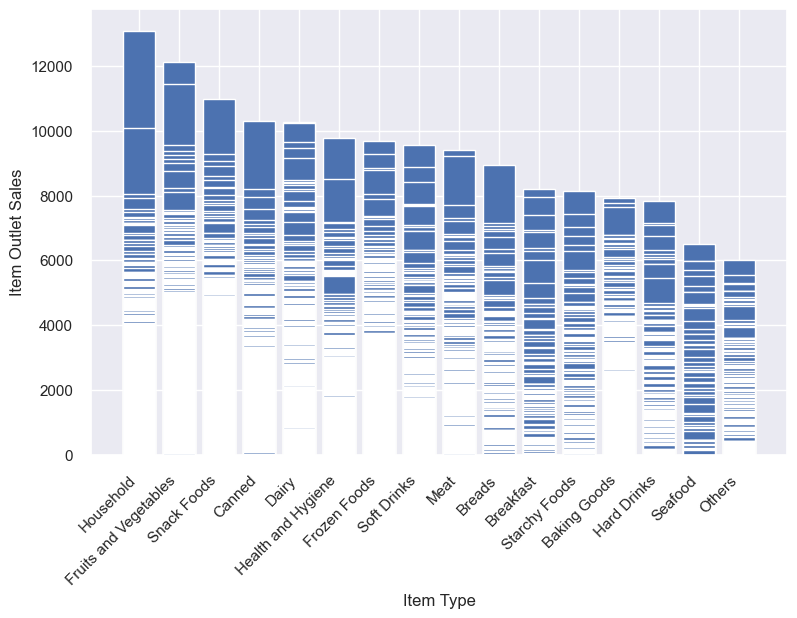

"# Create the bar plot with the sorted DataFrame\nsns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=df_sorted)\n\n# Rotate x-axis labels for better visibility\nplt.xticks(rotation=45)\n\n# Show the plot\nplt.show()"

In [130]:
'''sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45)'''

# Sort the DataFrame by 'Item_Outlet_Sales' in descending order
df_sorted = df.sort_values(by='Item_Outlet_Sales', ascending=False)

plt.bar(df_sorted['Item_Type'], df_sorted['Item_Outlet_Sales'])
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()


'''# Create the bar plot with the sorted DataFrame
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=df_sorted)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()'''

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

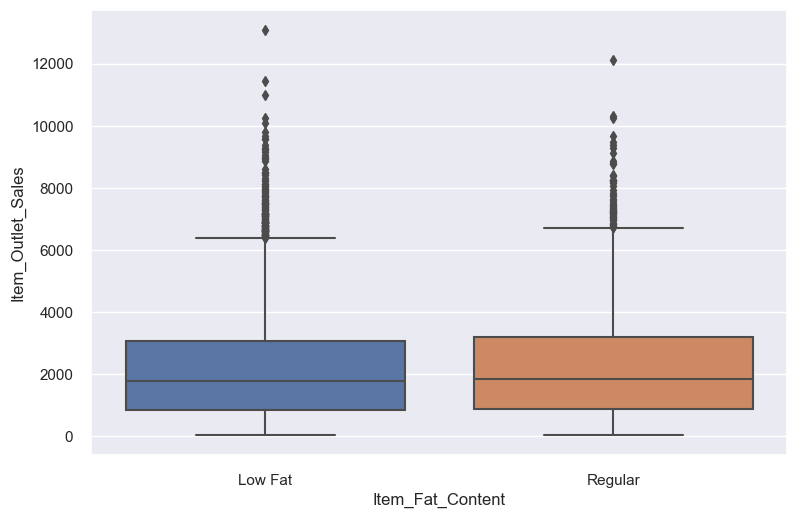

In [131]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

### sweetviz

In [139]:
x_orig = train_data.drop(['Item_Outlet_Sales'], axis=1) # removing Item_Outlet_Sales feature
y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales']) 

# y_orig : adding only one feature to y_orig

In [140]:
y_orig.shape

(8523, 1)

In [141]:
### Input and Output Feature Split

x_orig = train_data.drop(['Item_Outlet_Sales'], axis=1) # removing Item_Outlet_Sales feature
y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales']) 

# y_orig : adding only one feature to y_orig

y_orig.shape#! pip install sweetviz

(8523, 1)

In [142]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
train_df_report = sv.analyze([x_orig, "Train"])

#display the report
train_df_report.show_html('train_df_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report train_df_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Autoviz

https://pypi.org/project/autoviz/

In [143]:
#!pip install autoviz
#!pip install xlrd

In [144]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set loaded: (8523, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 10


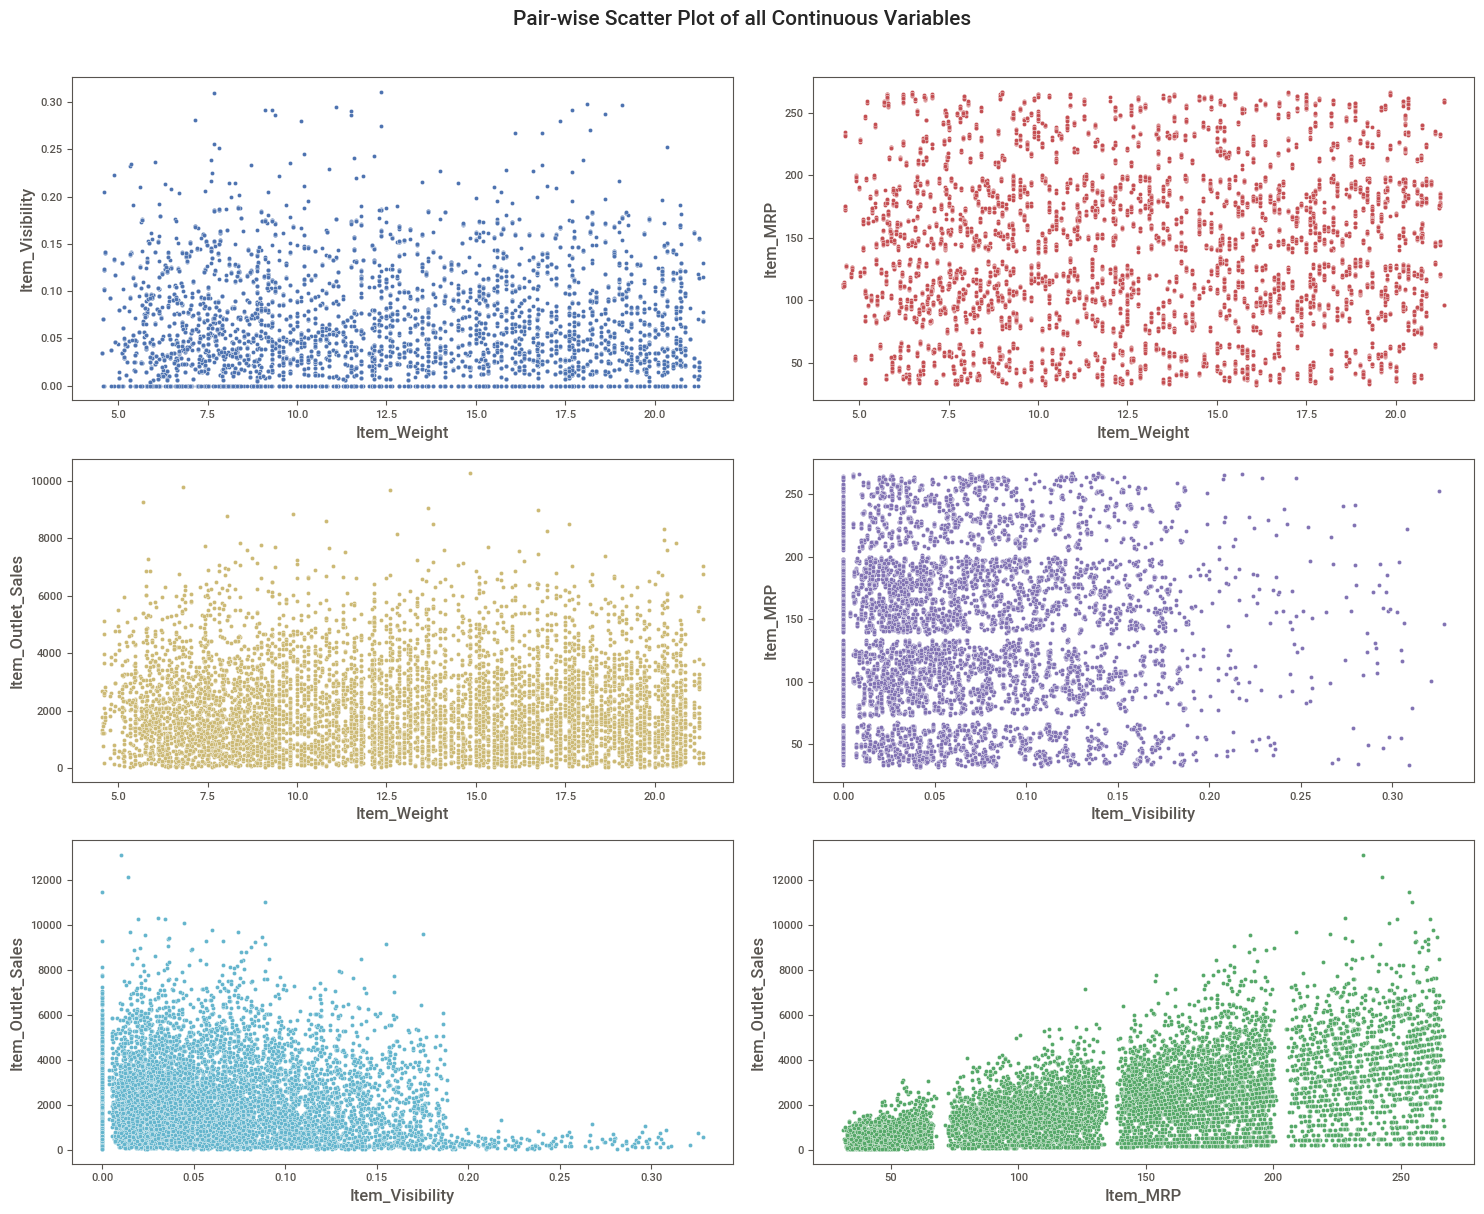

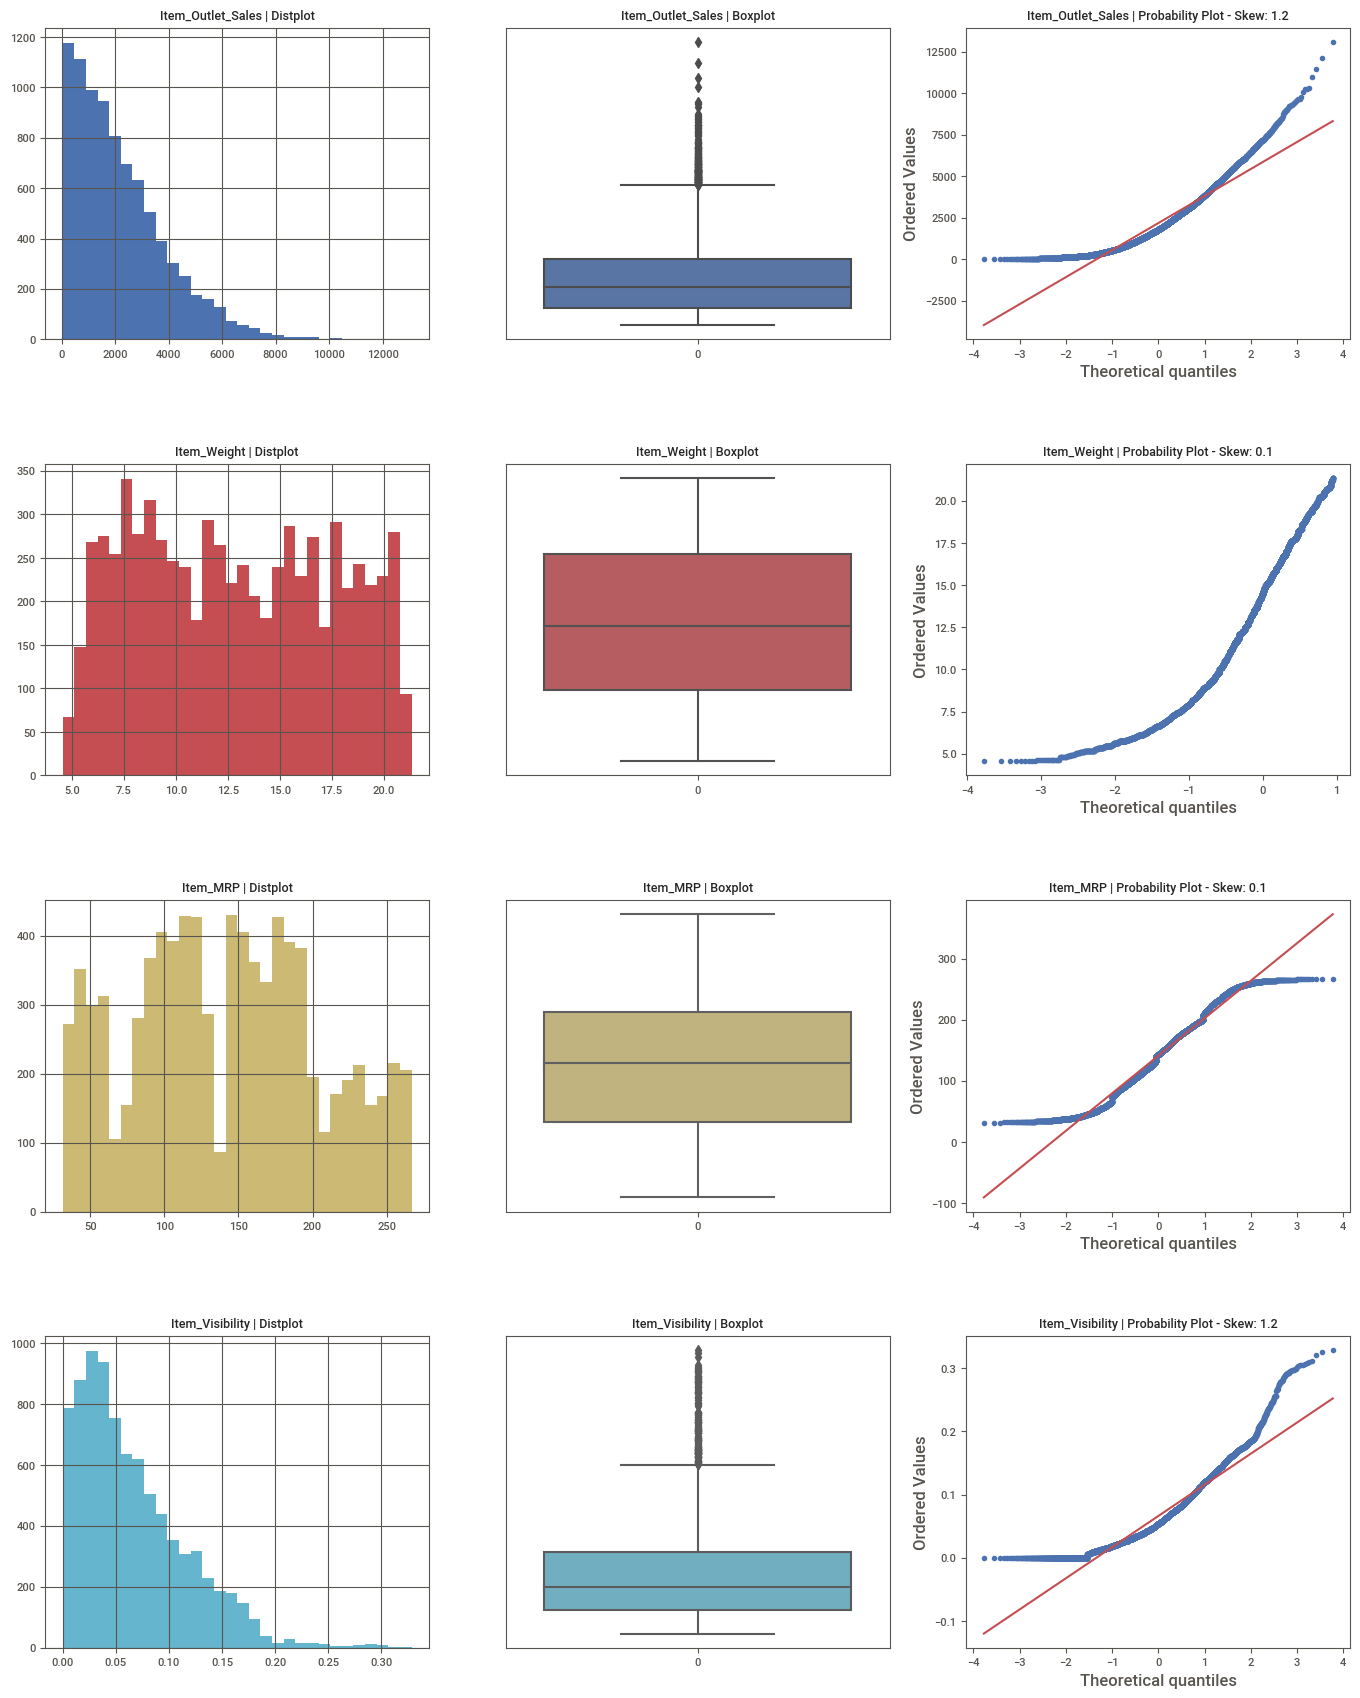

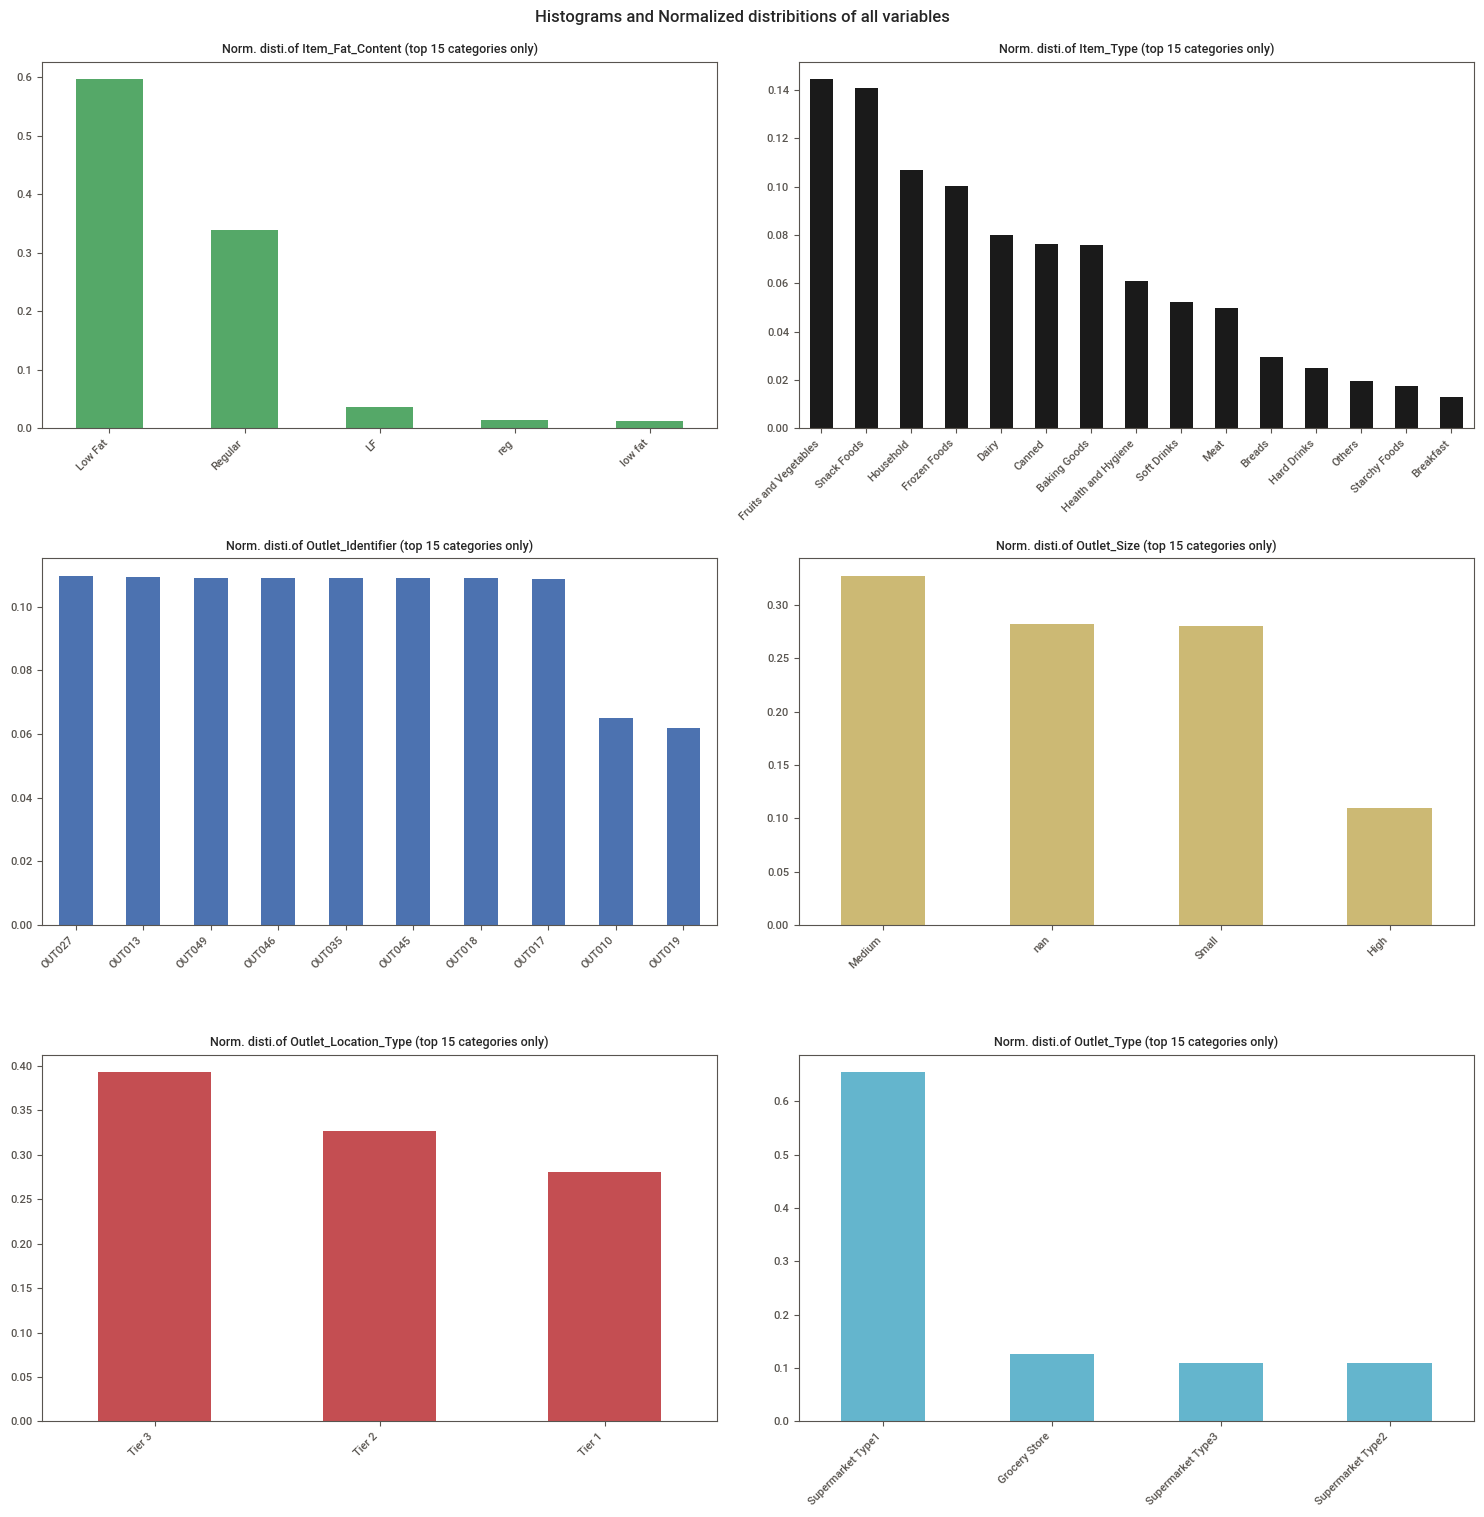

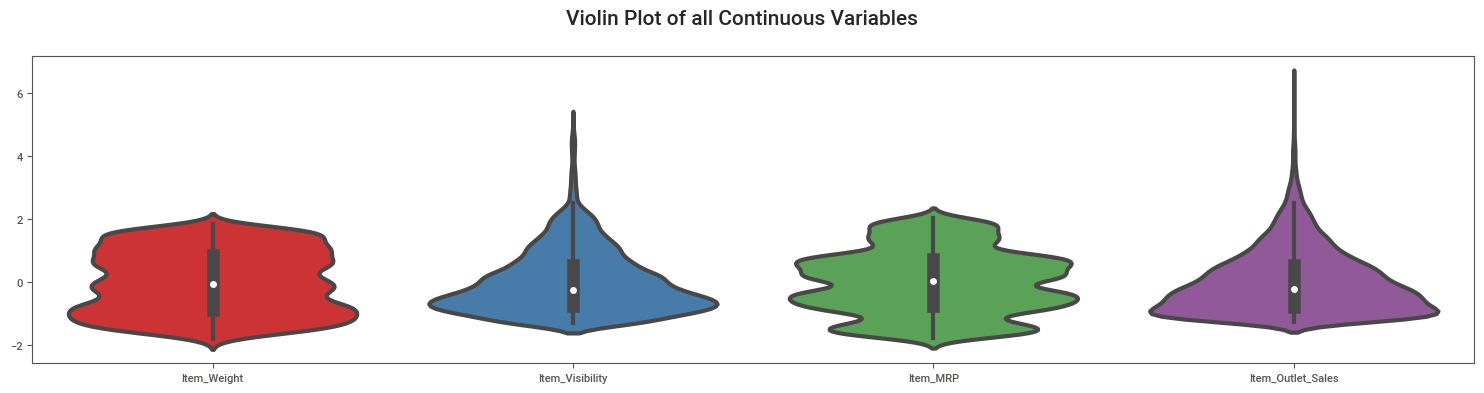

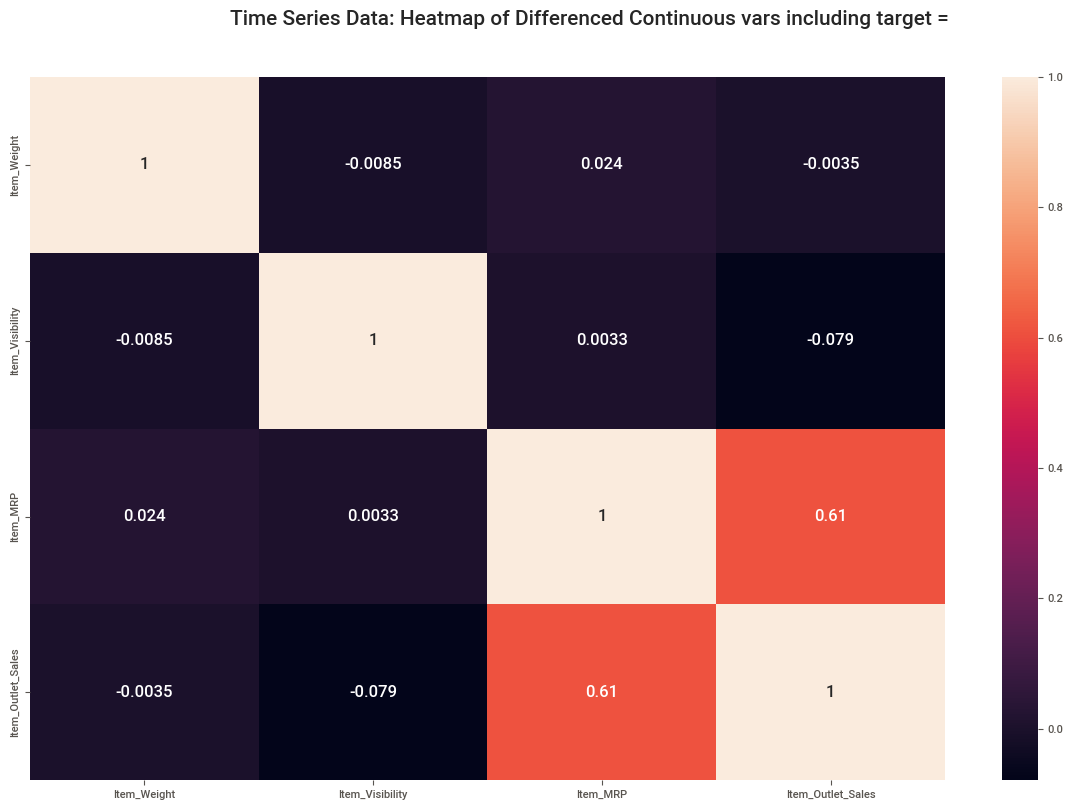

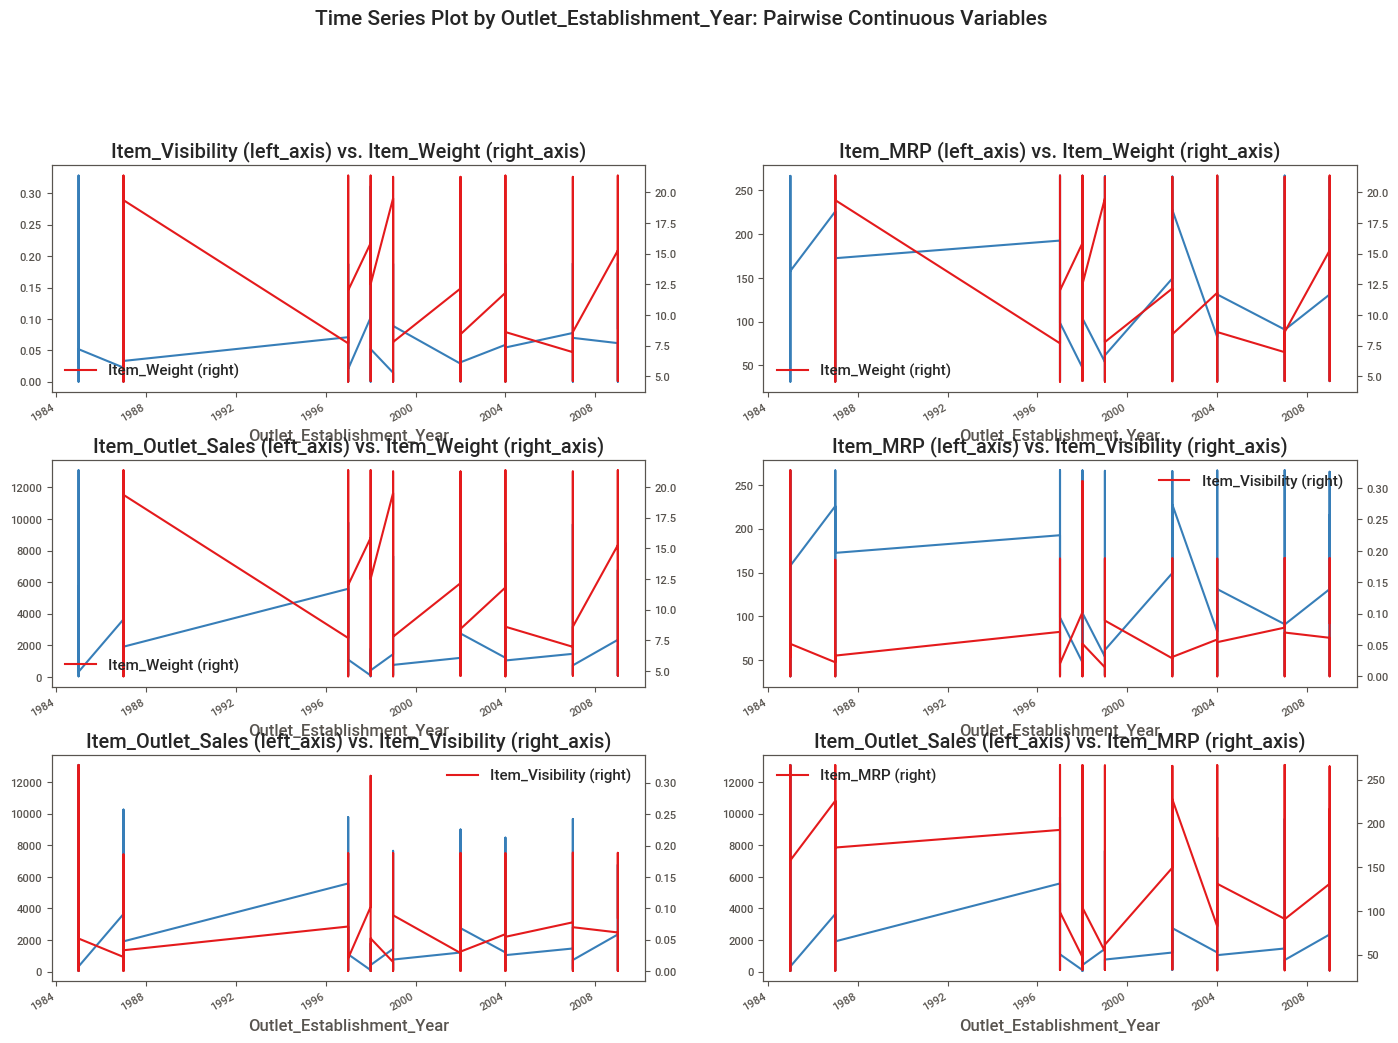

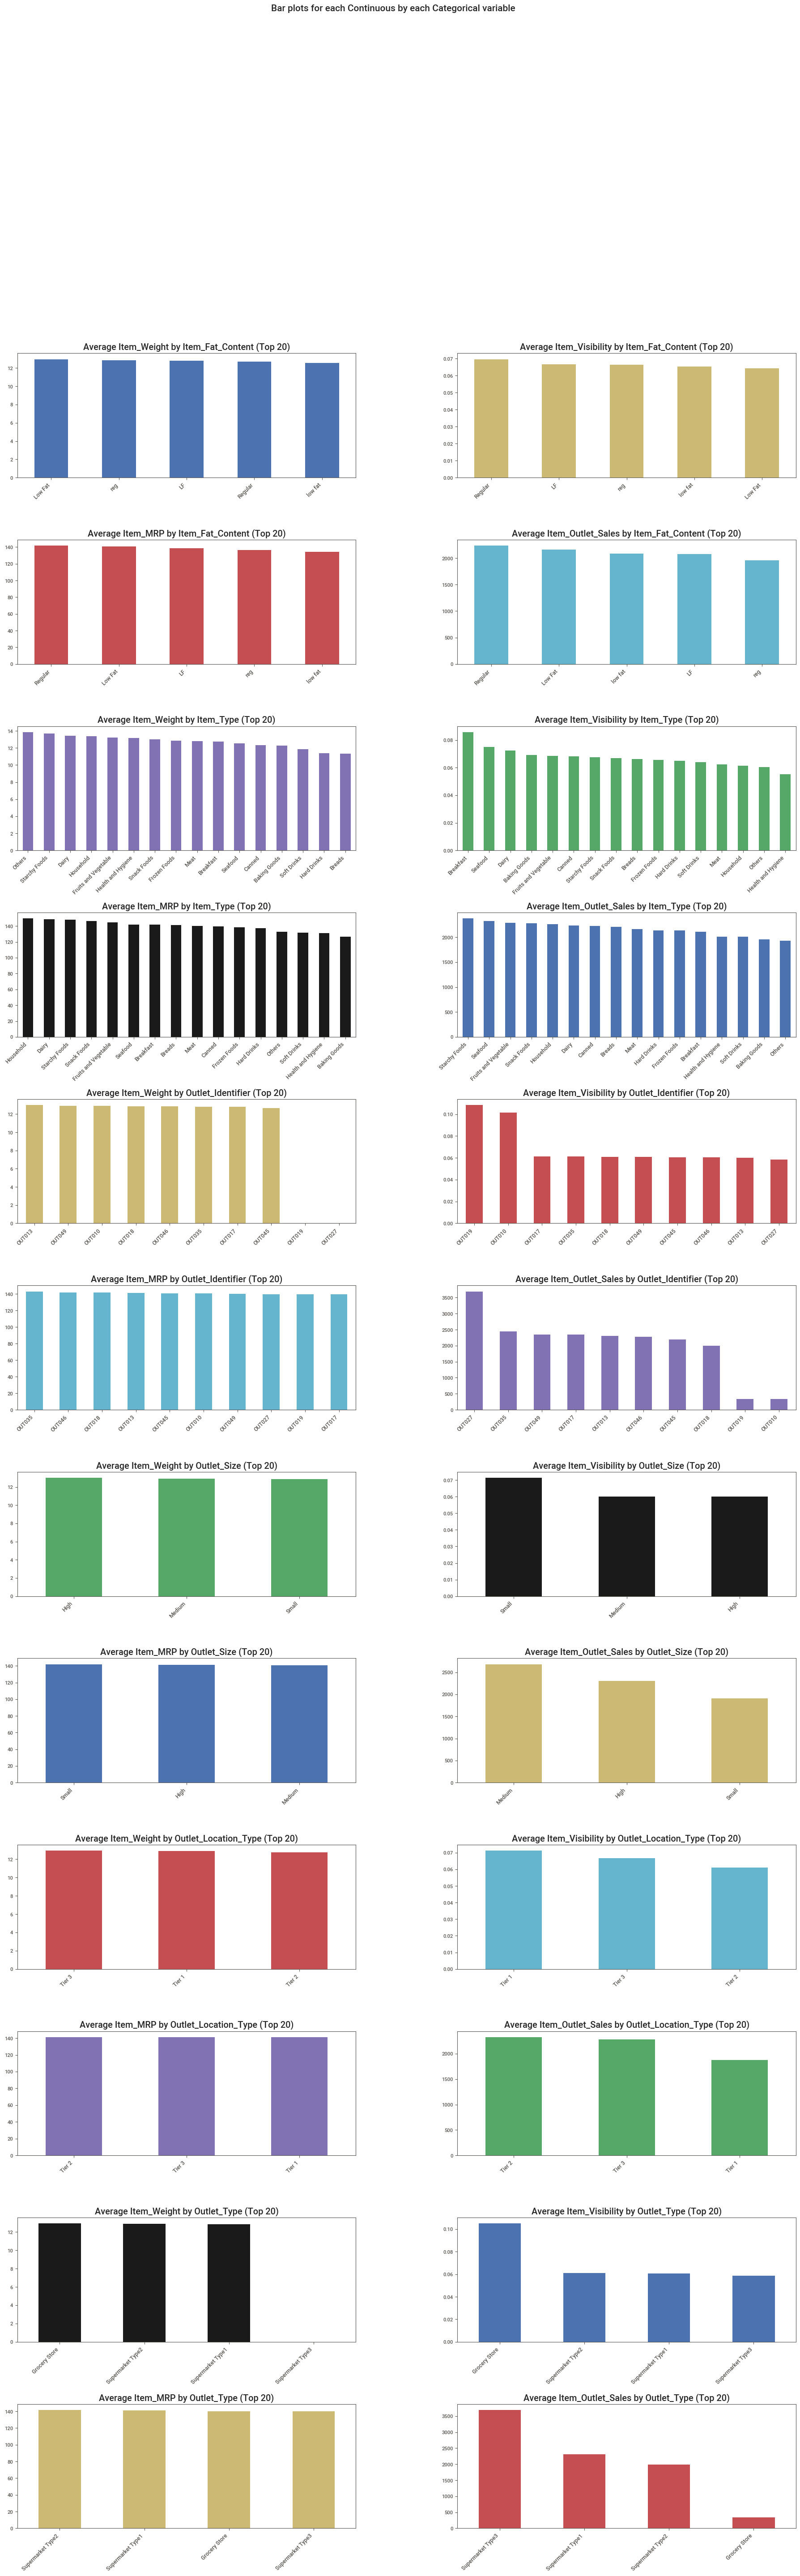

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\padhi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\padhi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\padhi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\padhi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\padhi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

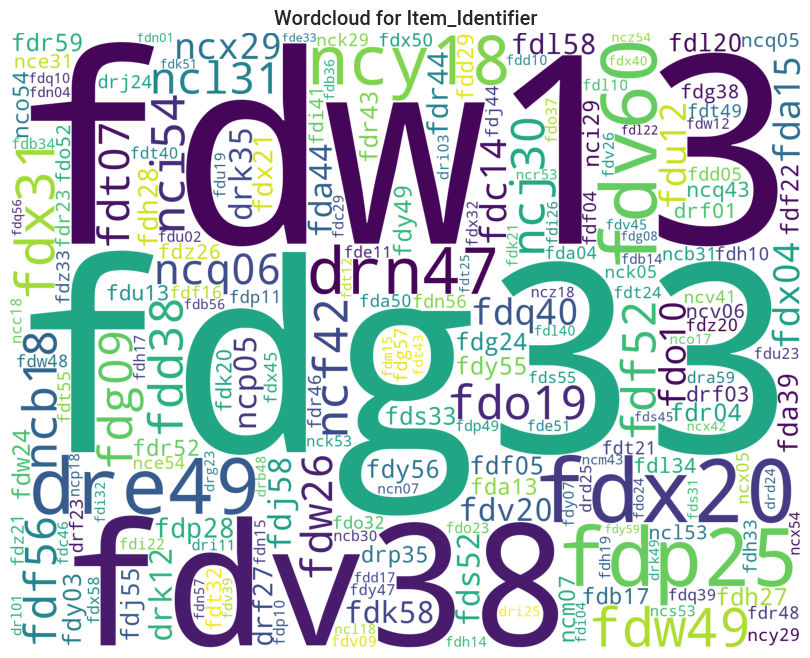

All Plots done
Time to run AutoViz = 34 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [145]:
filename = "train.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)